In [2]:
#Upload libraries
library(ggplot2)
library(dplyr)
library(ggpubr)
library(reshape2)
library(cowplot)
library(gridExtra)
library(devtools)
library(rstatix)
library(showtext)
library(extrafont)
library(dunn.test)
library(FSA)
library(stringr)


Attaching package: ‘cowplot’


The following object is masked from ‘package:ggpubr’:

    get_legend



Attaching package: ‘gridExtra’


The following object is masked from ‘package:dplyr’:

    combine


Loading required package: usethis


Attaching package: ‘rstatix’


The following object is masked from ‘package:stats’:

    filter


Loading required package: sysfonts

Loading required package: showtextdb

Registering fonts with R


Attaching package: ‘extrafont’


The following object is masked from ‘package:showtextdb’:

    font_install


Registered S3 methods overwritten by 'FSA':
  method       from
  confint.boot car 
  hist.boot    car 

## FSA v0.9.6. See citation('FSA') if used in publication.
## Run fishR() for related website and fishR('IFAR') for related book.



In [3]:
# Import male data from all groups
male_Data <- read.csv("normalized_genus MACHOS.csv", sep=";")
View(male_Data)
male_Data <- male_Data[-70,]
male_Data <- male_Data[,-22]
#Extend data to get long
data_male <- reshape2::melt(male_Data, id.vars = "Grupos")
head(data_male)

Grupos,Control,Control.1,Control.2,Control.3,Control.4,Chronic,Chronic.1,Chronic.2,Chronic.3,⋯,Binge.1,Binge.2,Binge.3,Binge.4,Chronic.Binge,Chronic.Binge.1,Chronic.Binge.2,Chronic.Binge.3,Chronic.Binge.4,Median
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Muribaculaceae,0.084815711,0.174528932,0.0665747380,0.065319591,0.123175877,0.177869630,0.108859649,0.043724620,0.079918646,⋯,0.062604214,0.112464572,0.098060406,0.073667922,0.127746939,0.191468155,0.047514620,0.043754082,0.091370180,0.143126683
Muribaculum,0.148783265,0.039756782,0.0753447325,0.075354850,0.044678055,0.021954194,0.089824561,0.030172821,0.023748280,⋯,0.025087161,0.059337876,0.031454411,0.042922497,0.034446050,0.125286554,0.098765432,0.068849706,0.038636533,0.105353952
Clostridia_UCG-014,0.067596414,0.034879059,0.0651406509,0.138685471,0.073449063,0.097370917,0.100745614,0.053121163,0.036729078,⋯,0.097316962,0.086896219,0.072692111,0.073735199,0.130560414,0.065782916,0.067007797,0.059613770,0.041470873,0.078550990
Faecalibaculum,0.048598264,0.042696779,0.0464423607,0.000000000,0.069368559,0.054546687,0.049166667,0.110539239,0.010408566,⋯,0.000000000,0.029729241,0.000000000,0.000000000,0.155881682,0.190670786,0.136695906,0.145162795,0.111285150,0.070259283
Bacteroides,0.062117547,0.030535881,0.0230005516,0.051577615,0.003458054,0.064236346,0.074078947,0.046935499,0.061972842,⋯,0.001212672,0.057770005,0.038166202,0.069765877,0.047753023,0.048838832,0.073424301,0.043007743,0.100246140,0.061332020
Butyricimonas,0.031023196,0.048443138,0.0457253172,0.059849923,0.054498928,0.068640737,0.048903509,0.023326093,0.053897230,⋯,0.000000000,0.046915516,0.034355270,0.031485468,0.041441715,0.000000000,0.000000000,0.067916783,0.076303424,0.055758593
Lactobacillus,0.048171339,0.026192703,0.0501930502,0.054380255,0.065149734,0.022428513,0.047324561,0.028756256,0.066878028,⋯,0.070713961,0.036422843,0.027415960,0.121030678,0.012546574,0.026014153,0.059372969,0.004104861,0.023122250,0.050331819
Alistipes,0.023053935,0.000000000,0.0327082184,0.018804810,0.000000000,0.046144464,0.035175439,0.019029181,0.063288868,⋯,0.032893740,0.041789785,0.009385132,0.042855221,0.064633868,0.032592445,0.045321637,0.040022390,0.072350265,0.047140618
Lachnospiraceae_UCG-001,0.021915469,0.034144060,0.0462768891,0.025404575,0.021785739,0.038081041,0.042675439,0.041363679,0.038882575,⋯,0.020994391,0.047518543,0.028041636,0.021999462,0.050034218,0.052925346,0.053443795,0.032465715,0.055791751,0.039551454


,Grupos,variable,value
,<chr>,<fct>,<dbl>
1,Muribaculaceae,Control,0.08481571
2,Muribaculum,Control,0.14878326
3,Clostridia_UCG-014,Control,0.06759641
4,Faecalibaculum,Control,0.04859826
5,Bacteroides,Control,0.06211755
6,Butyricimonas,Control,0.03102320


In [4]:
#Remove suffixes for duplicates in collumn
data_male$variable <- as.character(data_male$variable)
data_male$variable[grep("^Control", data_male$variable)] <- "Control"
data_male$variable[grep("^Binge", data_male$variable)] <- "Binge"                                                   
data_male$variable[grep(".Binge.\\d+$", data_male$variable)] <- "Chronic.Binge"
data_male$variable[grep("^Chronic.\\d+$", data_male$variable)] <- "Chronic"

head(data_male)

,Grupos,variable,value
,<chr>,<chr>,<dbl>
1,Muribaculaceae,Control,0.08481571
2,Muribaculum,Control,0.14878326
3,Clostridia_UCG-014,Control,0.06759641
4,Faecalibaculum,Control,0.04859826
5,Bacteroides,Control,0.06211755
6,Butyricimonas,Control,0.03102320


In [6]:
#Import font
font_import()
fonts()
font_import(pattern = "serif", prompt = TRUE, recursive = TRUE)
font_import(paths = "/usr/share/fonts/")
loadfonts(device = "win")

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /usr/share/fonts/, /usr/local/share/fonts/ ...

Extracting .afm files from .ttf files...

/usr/share/fonts/truetype/dejavu/DejaVuSans-Bold.ttf
 => /home/edbvb97/R/x86_64-pc-linux-gnu-library/4.4/extrafontdb/metrics/DejaVuSans-Bold

/usr/share/fonts/truetype/dejavu/DejaVuSans.ttf
 => /home/edbvb97/R/x86_64-pc-linux-gnu-library/4.4/extrafontdb/metrics/DejaVuSans

/usr/share/fonts/truetype/dejavu/DejaVuSansMono-Bold.ttf
 => /home/edbvb97/R/x86_64-pc-linux-gnu-library/4.4/extrafontdb/metrics/DejaVuSansMono-Bold

/usr/share/fonts/truetype/dejavu/DejaVuSansMono.ttf
 => /home/edbvb97/R/x86_64-pc-linux-gnu-library/4.4/extrafontdb/metrics/DejaVuSansMono

/usr/share/fonts/truetype/dejavu/DejaVuSerif-Bold.ttf
 => /home/edbvb97/R/x86_64-pc-linux-gnu-library/4.4/extrafontdb/metrics/DejaVuSerif-Bold

/usr/share/fonts/truetype/dejavu/DejaVuSerif.ttf
 => /home/edbvb97/R/x86_64-pc-linux-gnu-library/4.4/extrafontdb/metrics/DejaVuSerif

/usr/share/fonts/truetype/font-awesome/fontawe

[1] "cmex10"           "cmmi10"           "cmr10"            "cmsy10"          
 [5] "DejaVu Sans"      "DejaVu Sans Mono" "DejaVu Serif"     "dsrom10"         
 [9] "esint10"          "eufm10"           "FontAwesome"      "Lato Black"      
[13] "Lato"             "Lato Hairline"    "Lato Heavy"       "Lato Light"      
[17] "Lato Medium"      "Lato Semibold"    "Lato Thin"        "msam10"          
[21] "msbm10"           "rsfs10"           "stmary10"         "Ubuntu"          
[25] "Ubuntu Light"     "Ubuntu Thin"      "Ubuntu Condensed" "Ubuntu Mono"     
[29] "wasy10"

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  y


Scanning ttf files in /usr/share/fonts/, /usr/local/share/fonts/ ...

Extracting .afm files from .ttf files...



ERROR: Error in data.frame(fontfile = ttfiles, FontName = "", stringsAsFactors = FALSE): arguments imply differing number of rows: 0, 1


In [7]:
#Additional to the graph

my_palette <- c("#0000ff","#ff8000","#ff0000","#00ff00")

In [8]:
# Define the order of the groups
group_order <- c("Control", "Chronic", "Binge", "Chronic.Binge")

# Convert the 'variable' variable to a factor with the specified order
data_male$variable <- factor(data_male$variable, levels = group_order)


# Automatically extract unique group names from the 'Grupos' column
groups_to_analyze <- unique(data_male$Grupos)

# Create an empty list to store results
kruskal_results <- list()

In [10]:
# Loop over each group
for (group in groups_to_analyze) {
  # Subset the data for the current group
  grouped_data <- data_male[data_male$Grupos == group, ]
  
  # Perform the Dunn test
  kruskal_test <- dunn_test(grouped_data, value ~ variable, p.adjust.method = "bonferroni")
  
  # Store the result in the list
  kruskal_results[[group]] <- kruskal_test
}

ERROR: [1m[33mError[39m in `add_column()`:[22m
[1m[22m[33m![39m New columns must be compatible with `.data`.
[31m✖[39m New column has 6 rows.
[36mℹ[39m `.data` has 0 rows.


In [11]:
# Combine results into a single data frame
kruskal_combined <- do.call(rbind, lapply(names(kruskal_results), function(group) {
  result <- kruskal_results[[group]]
  result$Group <- group  # Add a column to indicate the group
  return(result)
}))

# View the combined results
head(kruskal_combined)

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,Group
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
value,Control,Chronic,5,5,-0.05345225,0.9573716,1,ns,Muribaculaceae
value,Control,Binge,5,5,-0.69487923,0.4871310,1,ns,Muribaculaceae
value,Control,Chronic.Binge,5,5,-0.21380899,0.8306960,1,ns,Muribaculaceae
value,Chronic,Binge,5,5,-0.64142698,0.5212453,1,ns,Muribaculaceae
value,Chronic,Chronic.Binge,5,5,-0.16035675,0.8726001,1,ns,Muribaculaceae
value,Binge,Chronic.Binge,5,5,0.48107024,0.6304666,1,ns,Muribaculaceae


In [13]:
#filter by those whose are significant
kruskal_combined_sig <- kruskal_combined%>% filter(p.adj.signif !="ns")
print(kruskal_combined_sig)
# Identify missing groups
missing_groups <- setdiff(groups_to_analyze, kruskal_combined$Group)
missing_groups

# A tibble: 9 × 10
  .y.   group1  group2     n1    n2 statistic       p   p.adj p.adj.signif Group
  <chr> <chr>   <chr>   <int> <int>     <dbl>   <dbl>   <dbl> <chr>        <chr>
1 value Binge   Chroni…     5     5      2.71 6.74e-3 0.0404  *            Faec…
2 value Control Chroni…     5     5      2.89 3.88e-3 0.0233  *            Alis…
3 value Binge   Chroni…     5     5      2.73 6.41e-3 0.0385  *            Lach…
4 value Control Chroni…     5     5      2.73 6.41e-3 0.0385  *            Lach…
5 value Binge   Chroni…     5     5     -3.32 9.15e-4 0.00549 **           ASF3…
6 value Control Chroni…     5     5     -2.98 2.89e-3 0.0173  *            Ente…
7 value Control Chronic     5     5     -2.69 7.08e-3 0.0425  *            Cand…
8 value Control Chroni…     5     5     -2.96 3.05e-3 0.0183  *            Cand…
9 value Binge   Chroni…     5     5     -2.69 7.08e-3 0.0425  *            Cand…


[1] "Staphylococcus"            "Tepidibacter"             
 [3] "RF39"                      "Shuttleworthia"           
 [5] "Roseburia"                 "Tyzzerella"               
 [7] "Blautia"                   "Lachnospira"              
 [9] "Erysipelatoclostridium"    "Anaerotruncus"            
[11] "GCA-900066575"             "Dorea"                    
[13] "Turicibacter"              "Monoglobus"               
[15] "Negativibacillus"          "Eubacterium_nodatum_group"
[17] "Lachnospiraceae_UCG-004"   "Akkermansia"

In [14]:
#taking out species with zero relative abundance
missing_groups <- missing_groups[!missing_groups %in% c("Staphylococcus", "Eubacterium_nodatum_group", "Akkermansia")]

#do for missing ones

# Initialize a list to store the results
kruskal_results_male_miss <- list()

# Loop through missing groups and perform the analysis
for (group in missing_groups) {
  # Subset the data for the current group
  grouped_data_miss <- subset(data_male, Grupos %in% group)
  
  # Perform the Dunn test and save the results to the list
  kruskal_results_male_miss[[group]] <- dunn_test(grouped_data_miss, value ~ variable, p.adjust.method = "bonferroni")
}

In [15]:
# View the results
View(kruskal_results_male_miss)

,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,value,Control,Chronic,5,5,2.051957,0.04017387,0.2410432,ns
2,value,Control,Binge,5,5,0.000000,1.00000000,1.0000000,ns
3,value,Control,Chronic.Binge,5,5,0.000000,1.00000000,1.0000000,ns
4,value,Chronic,Binge,5,5,-2.051957,0.04017387,0.2410432,ns
5,value,Chronic,Chronic.Binge,5,5,-2.051957,0.04017387,0.2410432,ns
6,value,Binge,Chronic.Binge,5,5,0.000000,1.00000000,1.0000000,ns
,.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif
,<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>
1,value,Control,Chronic,5,5,0.1318007,0.8951419,1,ns


In [16]:
# Combine results into a single data frame
kruskal_combined_miss <- do.call(rbind, lapply(names(kruskal_results_male_miss), function(group) {
  result1 <- kruskal_results_male_miss[[group]]
  result1$Group <- group  # Add a column to indicate the group
  return(result1)
}))

#see what is significant
kruskal_combined_sig_miss <- kruskal_combined_miss%>% filter(p.adj.signif !="ns")
kruskal_combined_sig_miss

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,Group
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
value,Control,Chronic,5,5,3.255395,0.001132348,0.006794086,**,Tyzzerella
value,Chronic,Binge,5,5,-3.026946,0.002470379,0.014822274,*,Tyzzerella


In [29]:
#Check again for Tyzzerella analysis 
grouped_male_Tyzzerella <- data_male[data_male$Grupos %in% 'Tyzzerella',]
grouped_male_Tyzzerella
kruskal_Tyzzerella <-dunn_test(grouped_male_Tyzzerella, value~variable, p.adjust.method = "bonferroni")

,Grupos,variable,value
,<chr>,<fct>,<dbl>
56,Tyzzerella,Control,0.000000000
125,Tyzzerella,Control,0.001403181
194,Tyzzerella,Control,0.000000000
263,Tyzzerella,Control,0.000000000
332,Tyzzerella,Control,0.000000000
401,Tyzzerella,Chronic,0.008402223
470,Tyzzerella,Chronic,0.017324561
539,Tyzzerella,Chronic,0.011899141
608,Tyzzerella,Chronic,0.009092541


In [18]:
#error in dunn_test with problematic ones that have zero relative abundance count
kruskal_Staphy <-dunn_test(subset(data_male, Grupos %in% "Staphylococcus"), value~variable, p.adjust.method = "bonferroni")

kruskal_Eubacterium_nodatum_group <-dunn_test(subset(data_male, Grupos %in% "Eubacterium_nodatum_group"), value~variable, p.adjust.method = "bonferroni")

kruskal_Akkermansia <-dunn_test(subset(data_male, Grupos %in% "Akkermansia"), value~variable, p.adjust.method = "bonferroni")

ERROR: [1m[33mError[39m in `add_column()`:[22m
[1m[22m[33m![39m New columns must be compatible with `.data`.
[31m✖[39m New column has 6 rows.
[36mℹ[39m `.data` has 0 rows.


In [19]:
#Combine the separated results
kruskal_male_all_results <- rbind(kruskal_combined,kruskal_combined_miss)


library(readr)
write_tsv(kruskal_male_all_results, "Kruskal_male_result.tsv")

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,collum_p_alis,p_label
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
value,Control,Chronic,5,5,1.9784771,0.047874907,0.28724944,ns,0.050,p = 0.287
value,Control,Binge,5,5,1.4437536,0.148808306,0.89284983,ns,0.066,p = 0.893
value,Control,Chronic.Binge,5,5,2.8875071,0.003883078,0.02329847,*,0.090,p = 0.023
value,Chronic,Binge,5,5,-0.5347235,0.592841037,1.00000000,ns,0.070,p = 1
value,Chronic,Chronic.Binge,5,5,0.9090300,0.363334276,1.00000000,ns,0.070,p = 1
value,Binge,Chronic.Binge,5,5,1.4437536,0.148808306,0.89284983,ns,0.080,p = 0.893


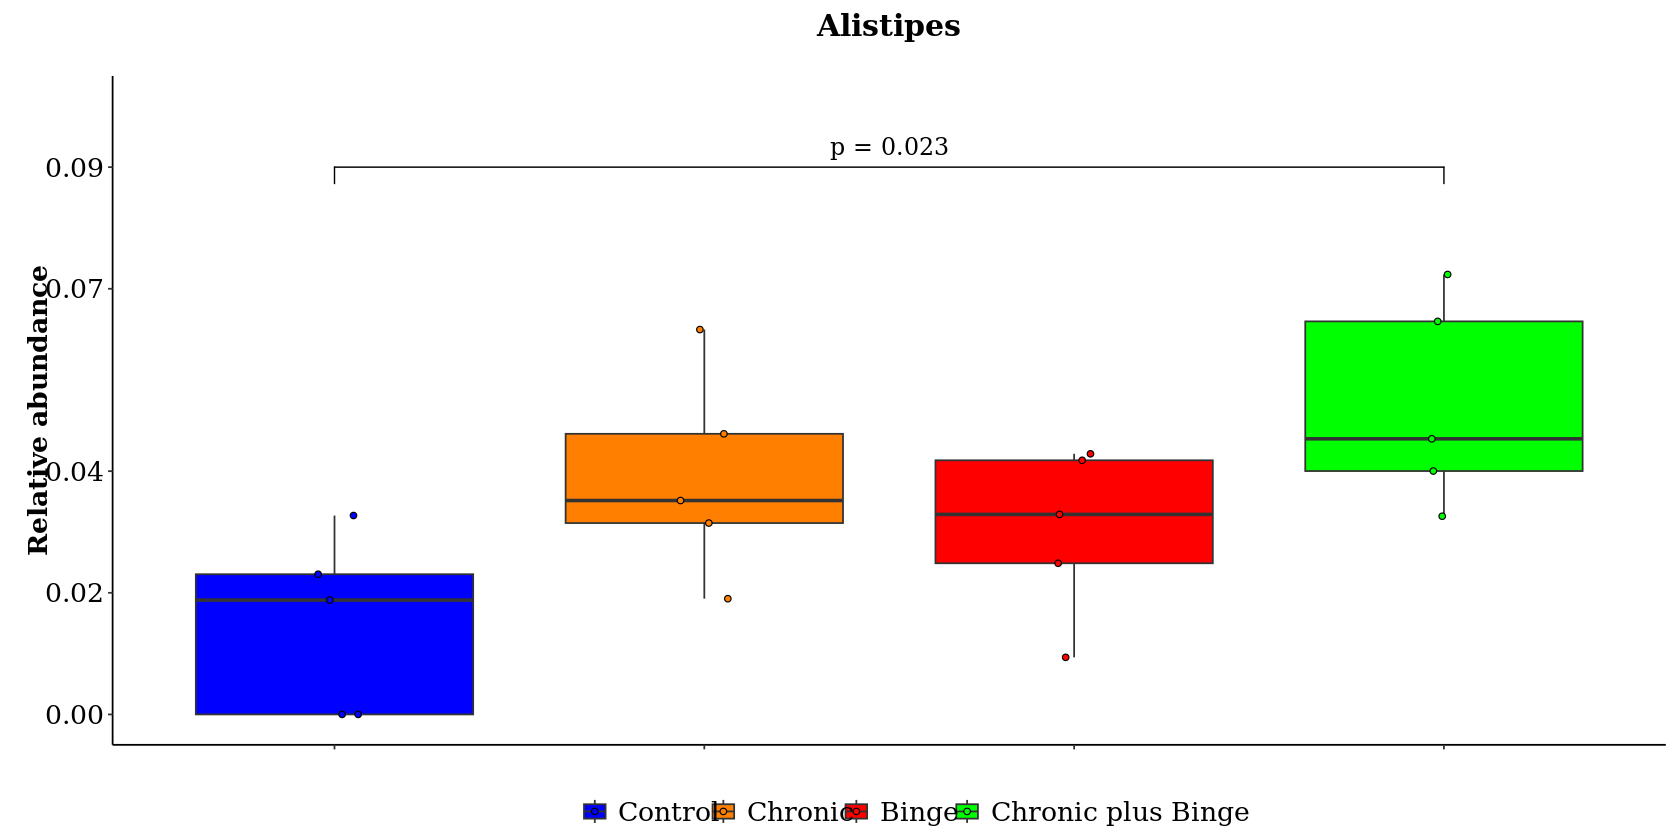

In [21]:
#preparing for the plots


collum_p_alis <- c(0.05, 0.066, 0.09, 0.07, 0.07, 0.08)
alis_all <- cbind(kruskal_results$Alistipes, collum_p_alis)
alis_all$p_label <- paste0("p = ", round(kruskal_results$Alistipes$p.adj, 3))
alis_all

#doing the plots

#Boxplot Graph  Alistipes
a <- ggplot(subset(data_male, Grupos %in% "Alistipes" ), aes(x= factor(variable), y = value)) +
  geom_boxplot(outlier.shape = NA, aes(fill = variable))+
  geom_point(aes(fill= variable),position = position_jitterdodge(), shape = 21)  + 
  stat_pvalue_manual(data = alis_all,
                     y.position = "collum_p_alis", 
                     label = "p_label", hide.ns = TRUE, bracket.size = 0.4, size = 5, family = "serif", vjust = -0.3) + 
  labs(title= "Alistipes", x = "", y ="Relative abundance") +
  scale_fill_manual(values = my_palette, labels = c("Control", "Chronic", "Binge", "Chronic plus Binge")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold", margin = margin(b = 20), family = "serif"),
        axis.text.x=element_blank(),
        axis.text.y = element_text(angle = 0, size = 16, colour = "black", family = "serif"),
        axis.text = element_text(size = 16, colour = "black", family = "serif"),
        axis.title=element_text(size=16, face = "bold", colour = "black", family = "serif"),
        strip.text.x = element_text(size = 14, face = "bold", colour = "black", family = "serif"),
        strip.background = element_blank(),
        panel.background = element_blank(),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom", legend.box="vertical", legend.margin=margin(), 
        legend.title=element_blank(),
        legend.text=element_text(size=16, family = "serif"),
        plot.margin = unit(c(3,3,3,6), units = "mm")) + scale_y_continuous(limits = c(0.0, 0.1), breaks = c(0.0,
                                                                                                             0.02, 0.04, 0.07,
                                                                                                            0.09)) 
options(repr.plot.width = 14, repr.plot.height = 7)
print(a)

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,collum_p_faec,p_label
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
value,Control,Chronic,5,5,0.9389509,0.347755955,1.00000000,ns,0.050,p = 1
value,Control,Binge,5,5,-0.3219260,0.747508739,1.00000000,ns,0.066,p = 1
value,Control,Chronic.Binge,5,5,2.3876180,0.016957958,0.10174775,ns,0.080,p = 0.102
value,Chronic,Binge,5,5,-1.2608769,0.207353195,1.00000000,ns,0.070,p = 1
value,Chronic,Chronic.Binge,5,5,1.4486671,0.147430573,0.88458344,ns,0.070,p = 0.885
value,Binge,Chronic.Binge,5,5,2.7095440,0.006737576,0.04042546,*,0.230,p = 0.04


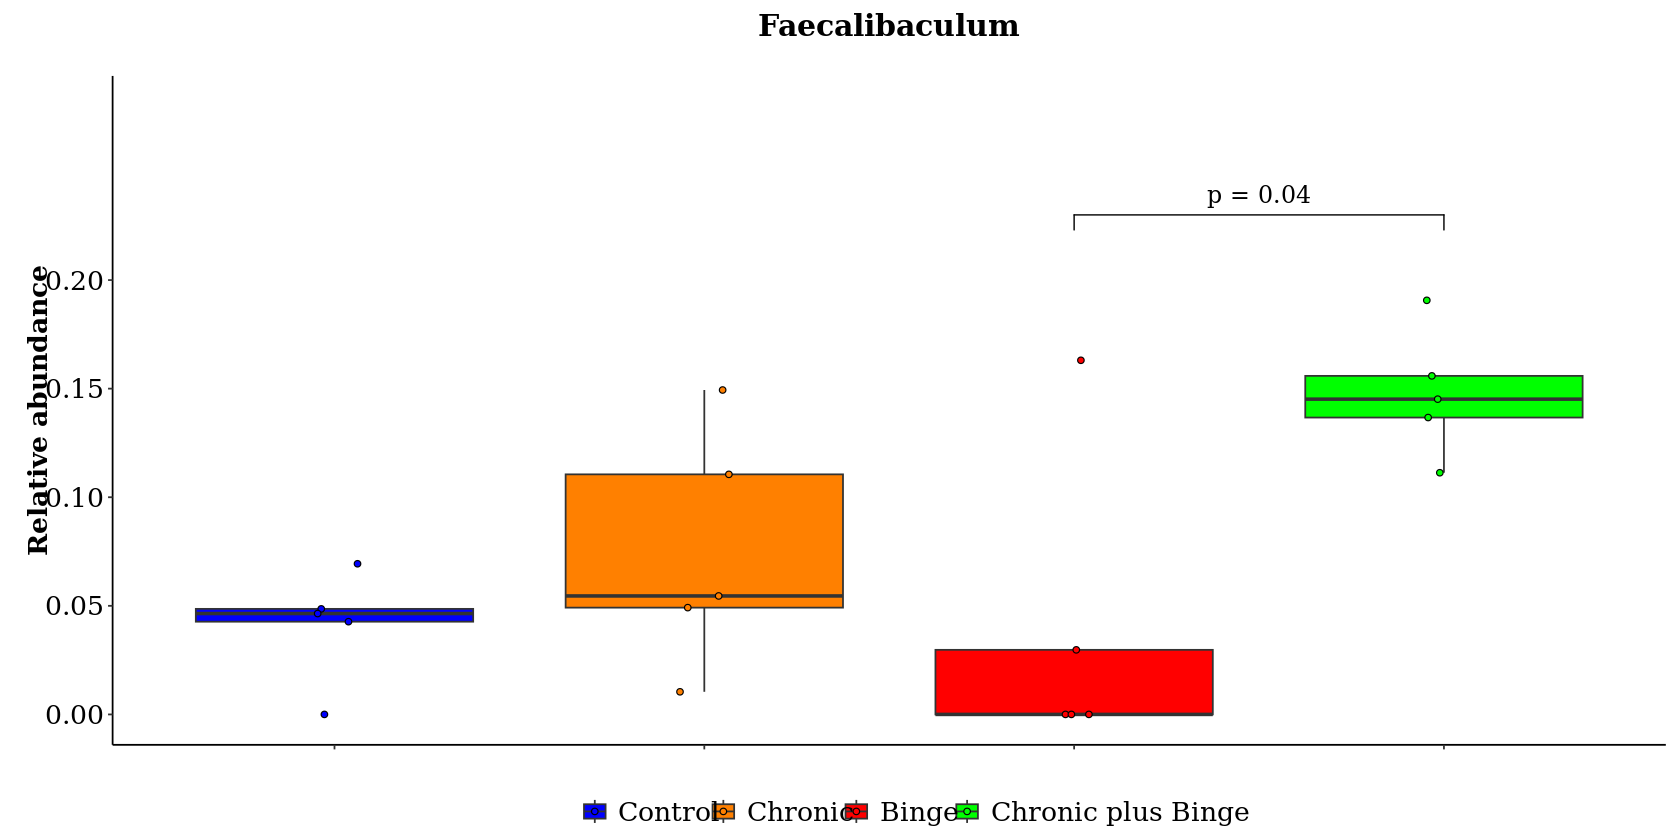

In [22]:
#preparing data for Faecalibaculum

collum_p_faec <- c(0.05, 0.066, 0.08, 0.07, 0.07, 0.23)
faec_all <- cbind(kruskal_results$Faecalibaculum, collum_p_faec)
faec_all$p_label <- paste0("p = ", round(kruskal_results$Faecalibaculum$p.adj, 3))
faec_all



#Boxplot Graph  Faecalibaculum
b <- ggplot(subset(data_male, Grupos %in% "Faecalibaculum"), aes(x= factor(variable), y = value)) +
  geom_boxplot(outlier.shape = NA, aes(fill = variable))+
  geom_point(aes(fill= variable),position = position_jitterdodge(), shape = 21)  + 
  stat_pvalue_manual(data = faec_all,
                     y.position = "collum_p_faec", 
                     label = "p_label", hide.ns = TRUE, bracket.size = 0.4, size = 5, family = "serif", vjust = -0.3) + 
  labs(title= "Faecalibaculum", x = "", y ="Relative abundance") +
  scale_fill_manual(values = my_palette, labels = c("Control", "Chronic", "Binge", "Chronic plus Binge")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold", margin = margin(b = 20), family = "serif"),
        axis.text.x=element_blank(),
        axis.text.y = element_text(angle = 0, size = 16, colour = "black", family = "serif"),
        axis.text = element_text(size = 16, colour = "black", family = "serif"),
        axis.title=element_text(size=16, face = "bold", colour = "black", family = "serif"),
        strip.text.x = element_text(size = 14, face = "bold", colour = "black", family = "serif"),
        strip.background = element_blank(),
        panel.background = element_blank(),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom", legend.box="vertical", legend.margin=margin(), 
        legend.title=element_blank(),
        legend.text=element_text(size=16, family = "serif"),
        plot.margin = unit(c(3,3,3,6), units = "mm")) + scale_y_continuous(limits = c(0.0, 0.28),
                                                                           breaks = c(0.0,  0.05,
                                                                                      0.10,0.15, 0.20)) 
options(repr.plot.width = 14, repr.plot.height = 7)
print(b)

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,collum_p_lach_001,p_label
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
value,Control,Chronic,5,5,1.3363062,0.181449208,1.00000000,ns,0.050,p = 1
value,Control,Binge,5,5,-0.2672612,0.789268026,1.00000000,ns,0.060,p = 1
value,Control,Chronic.Binge,5,5,2.4588034,0.013940092,0.08364055,ns,0.060,p = 0.084
value,Chronic,Binge,5,5,-1.6035675,0.108809430,0.65285658,ns,0.067,p = 0.653
value,Chronic,Chronic.Binge,5,5,1.1224972,0.261651091,1.00000000,ns,0.067,p = 1
value,Binge,Chronic.Binge,5,5,2.7260647,0.006409444,0.03845666,*,0.065,p = 0.038


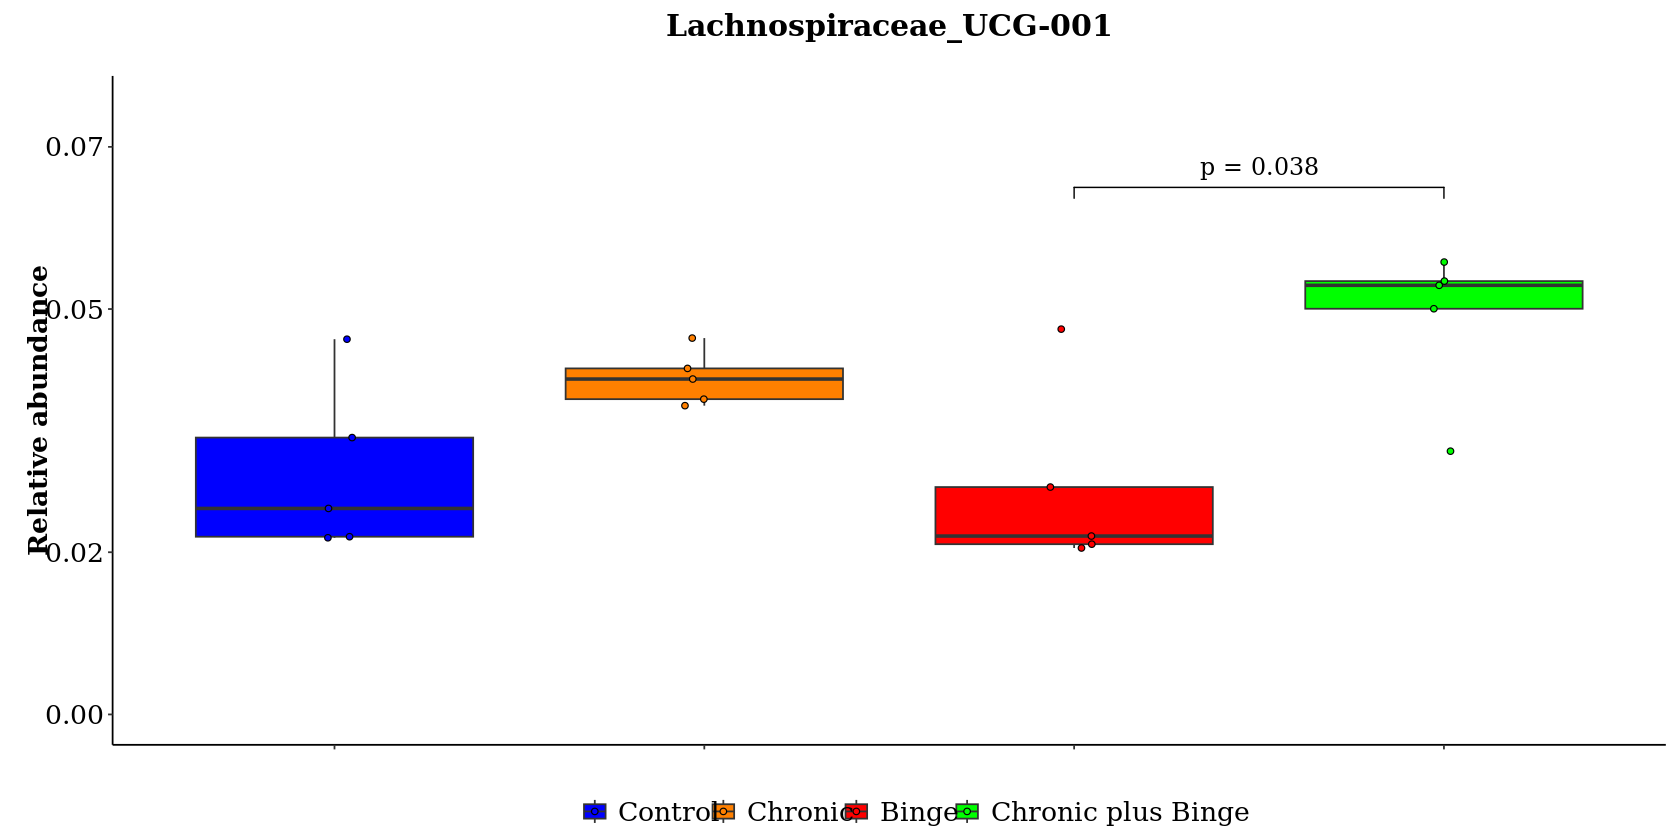

In [23]:
#preparing data for Lach-001

collum_p_lach_001 <- c(0.05, 0.06, 0.06, 0.067, 0.067, 0.065)
lach_001_all <- cbind(kruskal_results$`Lachnospiraceae_UCG-001`, collum_p_lach_001)
lach_001_all$p_label <- paste0("p = ", round(kruskal_results$`Lachnospiraceae_UCG-001`$p.adj, 3))
lach_001_all



#Boxplot Graph  Lachnospiraceae_UCG-001
c <- ggplot(subset(data_male, Grupos %in% "Lachnospiraceae_UCG-001"), aes(x= factor(variable), y = value)) +
  geom_boxplot(outlier.shape = NA, aes(fill = variable))+
  geom_point(aes(fill= variable),position = position_jitterdodge(), shape = 21)  + 
  stat_pvalue_manual(data = lach_001_all,
                     y.position = "collum_p_lach_001", 
                     label = "p_label", hide.ns = TRUE, bracket.size = 0.4, size = 5, family = "serif", vjust = -0.3) + 
  labs(title= "Lachnospiraceae_UCG-001", x = "", y ="Relative abundance") +
  scale_fill_manual(values = my_palette, labels = c("Control", "Chronic", "Binge", "Chronic plus Binge")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold", margin = margin(b = 20), family = "serif"),
        axis.text.x=element_blank(),
        axis.text.y = element_text(angle = 0, size = 16, colour = "black", family = "serif"),
        axis.text = element_text(size = 16, colour = "black", family = "serif"),
        axis.title=element_text(size=16, face = "bold", colour = "black", family = "serif"),
        strip.text.x = element_text(size = 14, face = "bold", colour = "black", family = "serif"),
        strip.background = element_blank(),
        panel.background = element_blank(),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom", legend.box="vertical", legend.margin=margin(), 
        legend.title=element_blank(),
        legend.text=element_text(size=16, family = "serif"),
        plot.margin = unit(c(3,3,3,6), units = "mm")) + scale_y_continuous(limits = c(0.0, 0.075),
                                                                           breaks = c(0.0,  0.02,
                                                                                      0.05,0.07)) 

print(c)

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,collum_p_lach_nk4,p_label
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
value,Control,Chronic,5,5,0.9086882,0.363514723,1.00000000,ns,0.090,p = 1
value,Control,Binge,5,5,1.6035675,0.108809430,0.65285658,ns,0.090,p = 0.653
value,Control,Chronic.Binge,5,5,2.7260647,0.006409444,0.03845666,*,0.100,p = 0.038
value,Chronic,Binge,5,5,0.6948792,0.487130991,1.00000000,ns,0.097,p = 1
value,Chronic,Chronic.Binge,5,5,1.8173764,0.069159492,0.41495695,ns,0.097,p = 0.415
value,Binge,Chronic.Binge,5,5,1.1224972,0.261651091,1.00000000,ns,0.095,p = 1


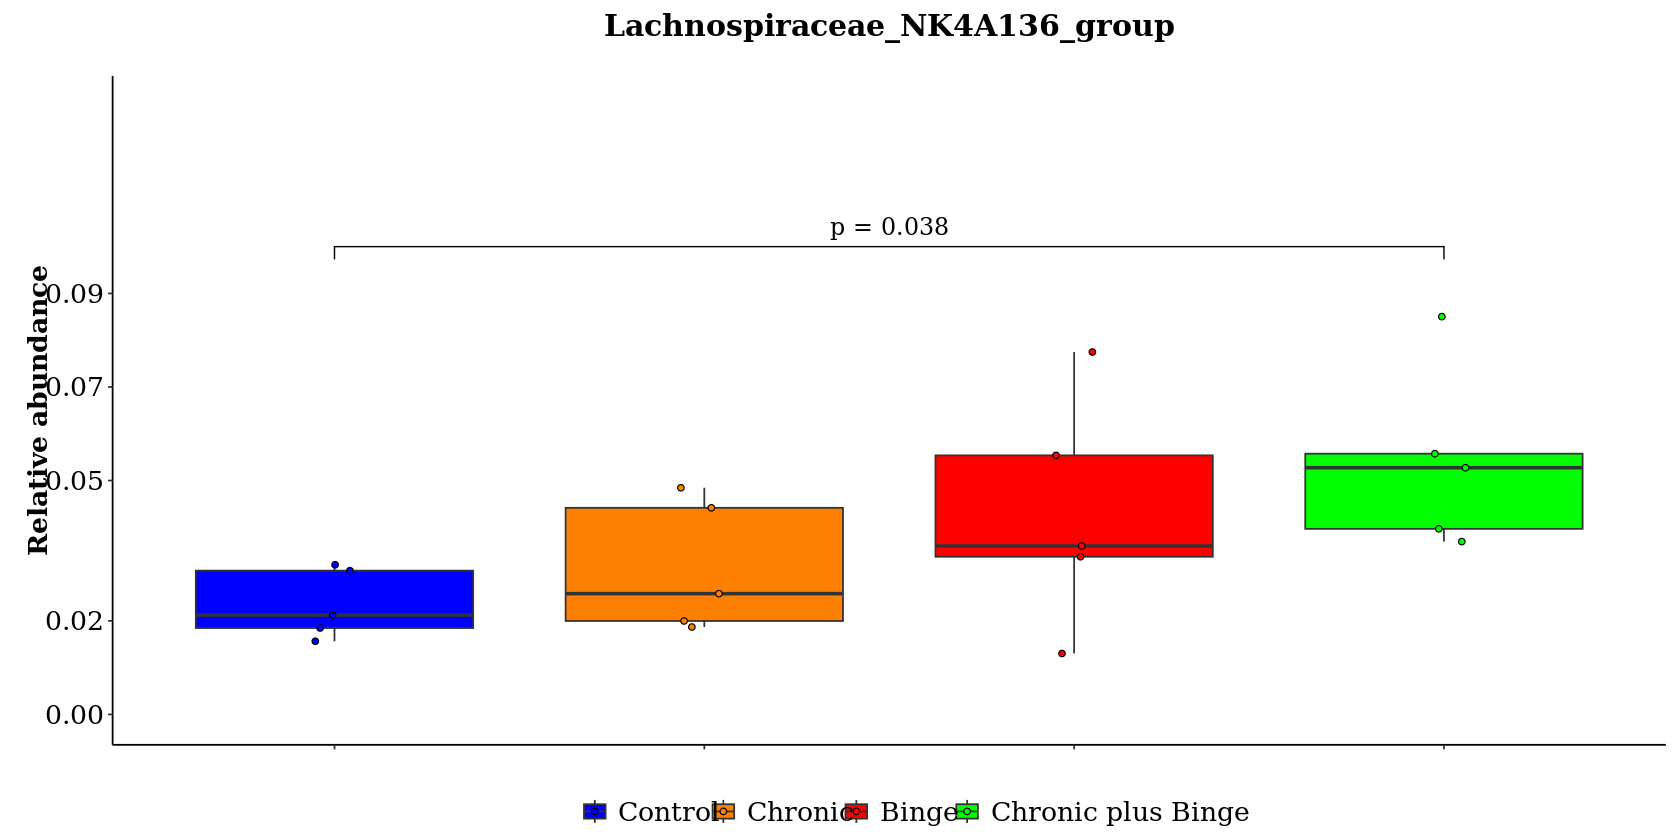

In [24]:
#preparing data for Lachnospiraceae_NK4A136_group

collum_p_lach_nk4 <- c(0.09, 0.09, 0.1, 0.097, 0.097, 0.095)
lach_nk4_all <- cbind(kruskal_results$Lachnospiraceae_NK4A136_group, collum_p_lach_nk4)
lach_nk4_all$p_label <- paste0("p = ", round(kruskal_results$Lachnospiraceae_NK4A136_group$p.adj, 3))
lach_nk4_all



#Boxplot Graph  Lachnospiraceae_NK4A136_group
d <- ggplot(subset(data_male, Grupos %in% "Lachnospiraceae_NK4A136_group"), aes(x= factor(variable), y = value)) +
  geom_boxplot(outlier.shape = NA, aes(fill = variable))+
  geom_point(aes(fill= variable),position = position_jitterdodge(), shape = 21)  + 
  stat_pvalue_manual(data = lach_nk4_all,
                     y.position = "collum_p_lach_nk4", 
                     label = "p_label", hide.ns = TRUE, bracket.size = 0.4, size = 5, family = "serif", vjust = -0.3) + 
  labs(title= "Lachnospiraceae_NK4A136_group", x = "", y ="Relative abundance") +
  scale_fill_manual(values = my_palette, labels = c("Control", "Chronic", "Binge", "Chronic plus Binge")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold", margin = margin(b = 20), family = "serif"),
        axis.text.x=element_blank(),
        axis.text.y = element_text(angle = 0, size = 16, colour = "black", family = "serif"),
        axis.text = element_text(size = 16, colour = "black", family = "serif"),
        axis.title=element_text(size=16, face = "bold", colour = "black", family = "serif"),
        strip.text.x = element_text(size = 14, face = "bold", colour = "black", family = "serif"),
        strip.background = element_blank(),
        panel.background = element_blank(),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom", legend.box="vertical", legend.margin=margin(), 
        legend.title=element_blank(),
        legend.text=element_text(size=16, family = "serif"),
        plot.margin = unit(c(3,3,3,6), units = "mm")) + scale_y_continuous(limits = c(0.0, 0.13),
                                                                           breaks = c(0.0,  0.02,
                                                                                      0.05,0.07, 0.09)) 

print(d)

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,collum_p_asf,p_label
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
value,Control,Chronic,5,5,-0.6416683,0.5210886054,1.000000000,ns,0.05,p = 1
value,Control,Binge,5,5,0.7486130,0.4540905162,1.000000000,ns,0.05,p = 1
value,Control,Chronic.Binge,5,5,-2.5666730,0.0102679386,0.061607632,ns,0.05,p = 0.062
value,Chronic,Binge,5,5,1.3902812,0.1644434988,0.986660993,ns,0.05,p = 0.987
value,Chronic,Chronic.Binge,5,5,-1.9250048,0.0542287623,0.325372574,ns,0.05,p = 0.325
value,Binge,Chronic.Binge,5,5,-3.3152860,0.0009154941,0.005492965,**,0.06,p = 0.005


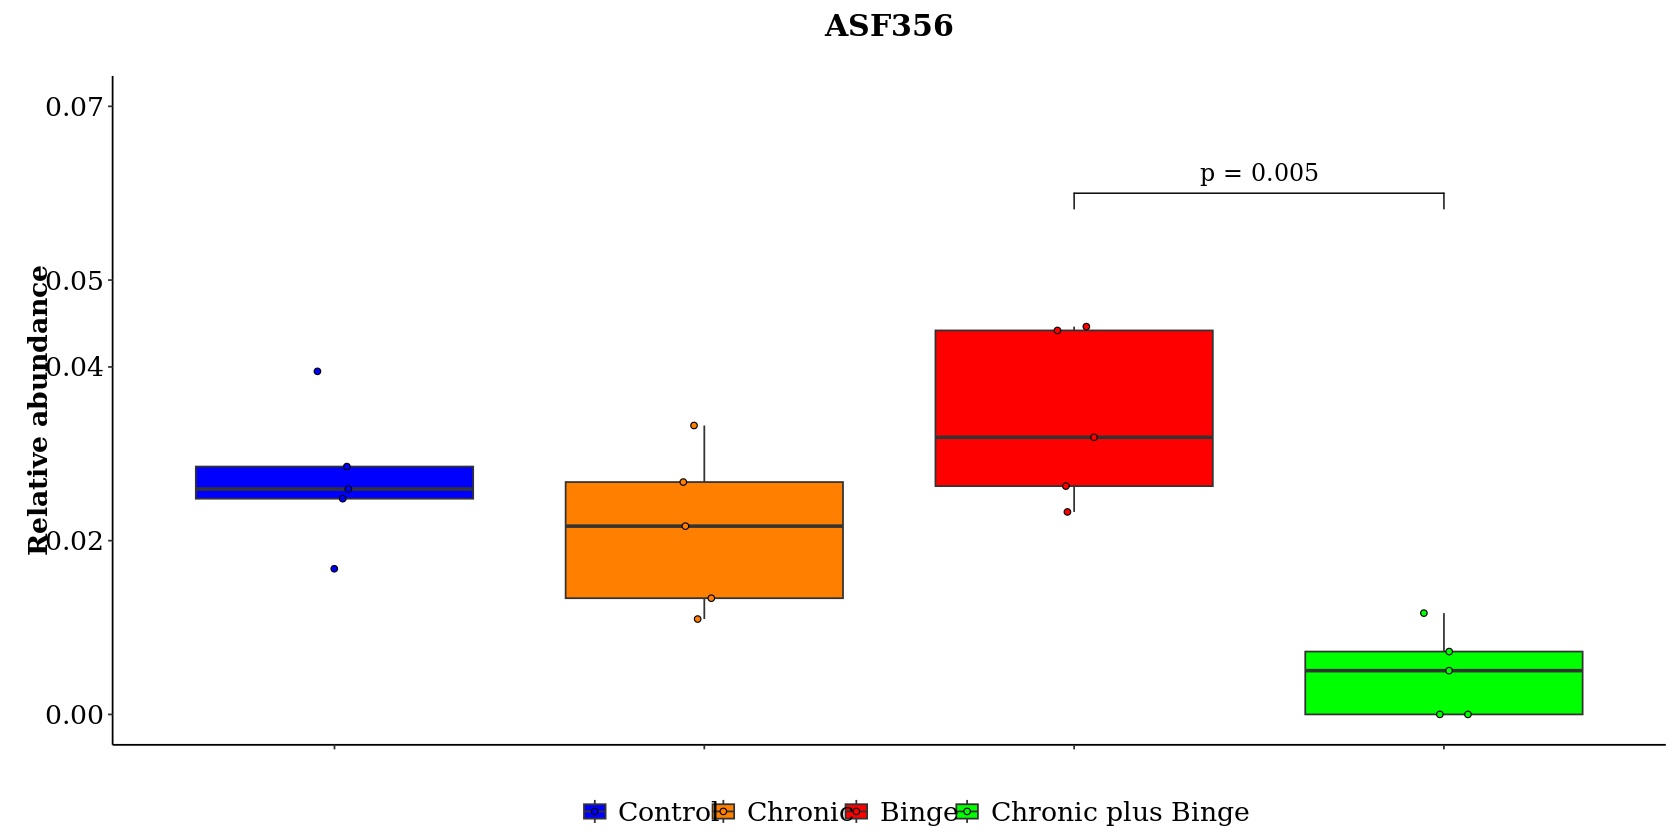

In [25]:
collum_p_asf <- c(0.05,0.05,0.05,0.05,0.05,0.06)
asf_all <- cbind(kruskal_results$ASF356, collum_p_asf)
asf_all$p_label <- paste0("p = ", round(kruskal_results$ASF356$p.adj, 3))
asf_all



#Boxplot Graph ASF356
e <- ggplot(subset(data_male, Grupos %in% "ASF356"), aes(x= factor(variable), y = value)) +
  geom_boxplot(outlier.shape = NA, aes(fill = variable))+
  geom_point(aes(fill= variable),position = position_jitterdodge(), shape = 21)  + 
  stat_pvalue_manual(data = asf_all,
                     y.position = "collum_p_asf", 
                     label = "p_label", hide.ns = TRUE, bracket.size = 0.4, size = 5, family = "serif", vjust = -0.3) + 
  labs(title= "ASF356", x = "", y ="Relative abundance") +
  scale_fill_manual(values = my_palette, labels = c("Control", "Chronic", "Binge", "Chronic plus Binge")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold", margin = margin(b = 20), family = "serif"),
        axis.text.x=element_blank(),
        axis.text.y = element_text(angle = 0, size = 16, colour = "black", family = "serif"),
        axis.text = element_text(size = 16, colour = "black", family = "serif"),
        axis.title=element_text(size=16, face = "bold", colour = "black", family = "serif"),
        strip.text.x = element_text(size = 14, face = "bold", colour = "black", family = "serif"),
        strip.background = element_blank(),
        panel.background = element_blank(),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom", legend.box="vertical", legend.margin=margin(), 
        legend.title=element_blank(),
        legend.text=element_text(size=16, family = "serif"),
        plot.margin = unit(c(3,3,3,6), units = "mm")) + scale_y_continuous(limits = c(0.0, 0.07),
                                                                           breaks = c(0.0, 0.02,0.04,
                                                                                      0.05,0.07)) 

print(e)

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,collum_p_Enterorhabdus,p_label
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
value,Control,Chronic,5,5,-1.272989,0.20302181,1.00000000,ns,0.050,p = 1
value,Control,Binge,5,5,-1.056310,0.29082646,1.00000000,ns,0.050,p = 1
value,Control,Chronic.Binge,5,5,-2.979337,0.00288873,0.01733238,*,0.016,p = 0.017
value,Chronic,Binge,5,5,0.216679,0.82845848,1.00000000,ns,0.050,p = 1
value,Chronic,Chronic.Binge,5,5,-1.706347,0.08794341,0.52766045,ns,0.050,p = 0.528
value,Binge,Chronic.Binge,5,5,-1.923026,0.05447672,0.32686034,ns,0.060,p = 0.327


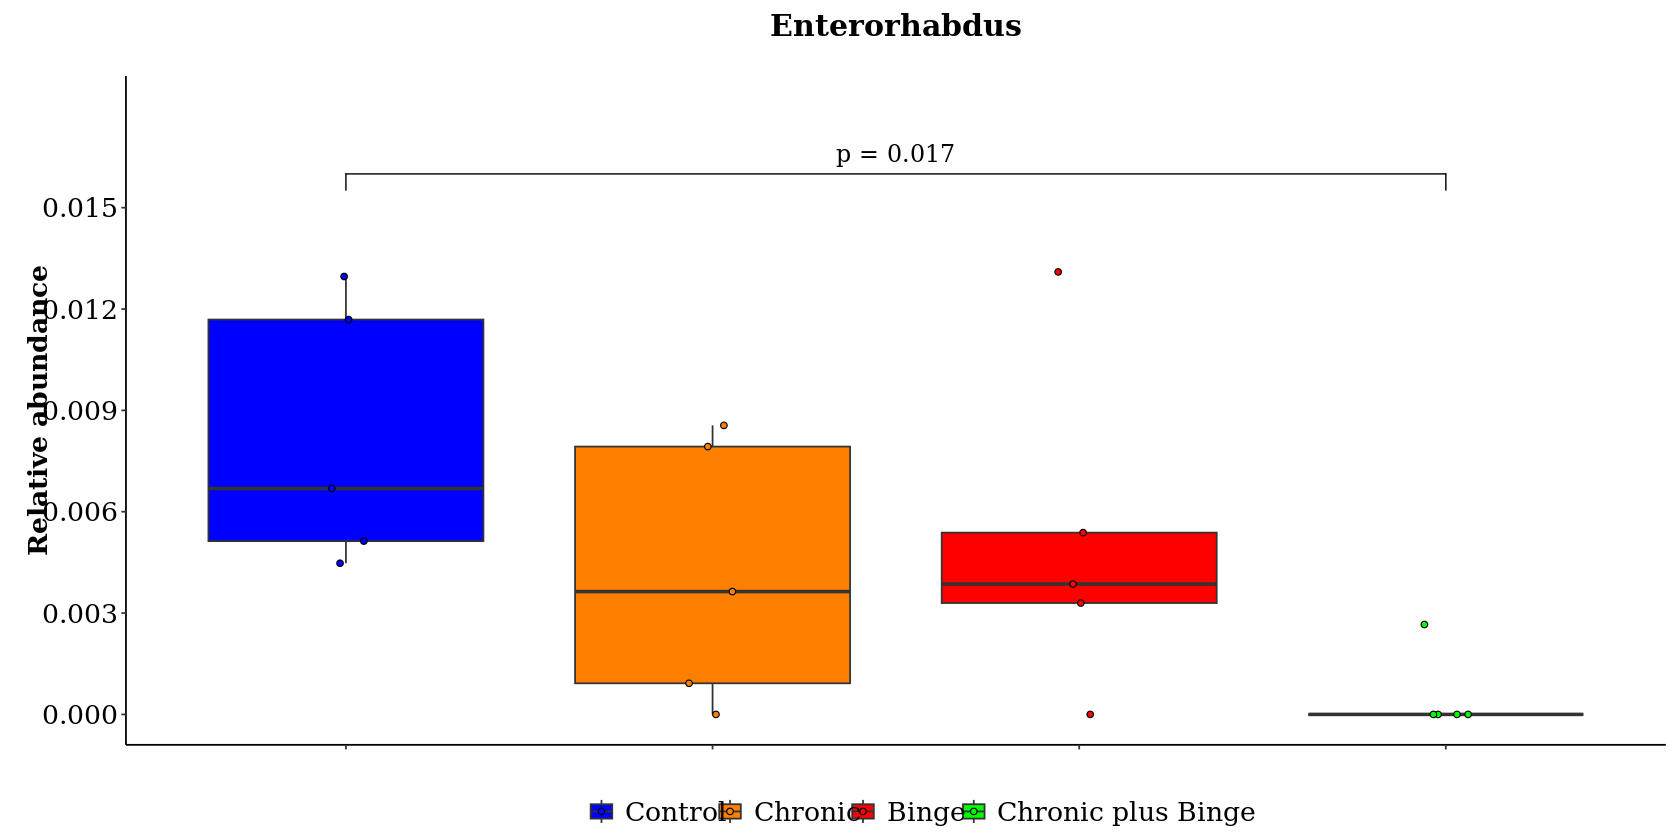

In [26]:
collum_p_Enterorhabdus <- c(0.05,0.05,0.016,0.05,0.05,0.06)
Enterorhabdus_all <- cbind(kruskal_results$Enterorhabdus, collum_p_Enterorhabdus)
Enterorhabdus_all$p_label <- paste0("p = ", round(kruskal_results$Enterorhabdus$p.adj, 3))
Enterorhabdus_all



#Boxplot Graph Enterorhabdus
f <- ggplot(subset(data_male, Grupos %in% "Enterorhabdus"), aes(x= factor(variable), y = value)) +
  geom_boxplot(outlier.shape = NA, aes(fill = variable))+
  geom_point(aes(fill= variable),position = position_jitterdodge(), shape = 21)  + 
  stat_pvalue_manual(data = Enterorhabdus_all,
                     y.position = "collum_p_Enterorhabdus", 
                     label = "p_label", hide.ns = TRUE, bracket.size = 0.4, size = 5, family = "serif", vjust = -0.3) + 
  labs(title= "Enterorhabdus", x = "", y ="Relative abundance") +
  scale_fill_manual(values = my_palette, labels = c("Control", "Chronic", "Binge", "Chronic plus Binge")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold", margin = margin(b = 20), family = "serif"),
        axis.text.x=element_blank(),
        axis.text.y = element_text(angle = 0, size = 16, colour = "black", family = "serif"),
        axis.text = element_text(size = 16, colour = "black", family = "serif"),
        axis.title=element_text(size=16, face = "bold", colour = "black", family = "serif"),
        strip.text.x = element_text(size = 14, face = "bold", colour = "black", family = "serif"),
        strip.background = element_blank(),
        panel.background = element_blank(),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom", legend.box="vertical", legend.margin=margin(), 
        legend.title=element_blank(),
        legend.text=element_text(size=16, family = "serif"),
        plot.margin = unit(c(3,3,3,6), units = "mm")) + scale_y_continuous(limits = c(0.0, 0.018),
                                                                           breaks = c(0.0, 0.003,0.006,
                                                                                      0.009,0.012, 0.015)) 

print(f)

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,collum_p_Arthromitus,p_label
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
value,Control,Chronic,5,5,-2.6929368,0.007082570,0.04249542,*,0.035,p = 0.042
value,Control,Binge,5,5,-0.2692937,0.787703698,1.00000000,ns,0.020,p = 1
value,Control,Chronic.Binge,5,5,-2.9622304,0.003054191,0.01832515,*,0.047,p = 0.018
value,Chronic,Binge,5,5,2.4236431,0.015365699,0.09219419,ns,0.024,p = 0.092
value,Chronic,Chronic.Binge,5,5,-0.2692937,0.787703698,1.00000000,ns,0.026,p = 1
value,Binge,Chronic.Binge,5,5,-2.6929368,0.007082570,0.04249542,*,0.062,p = 0.042


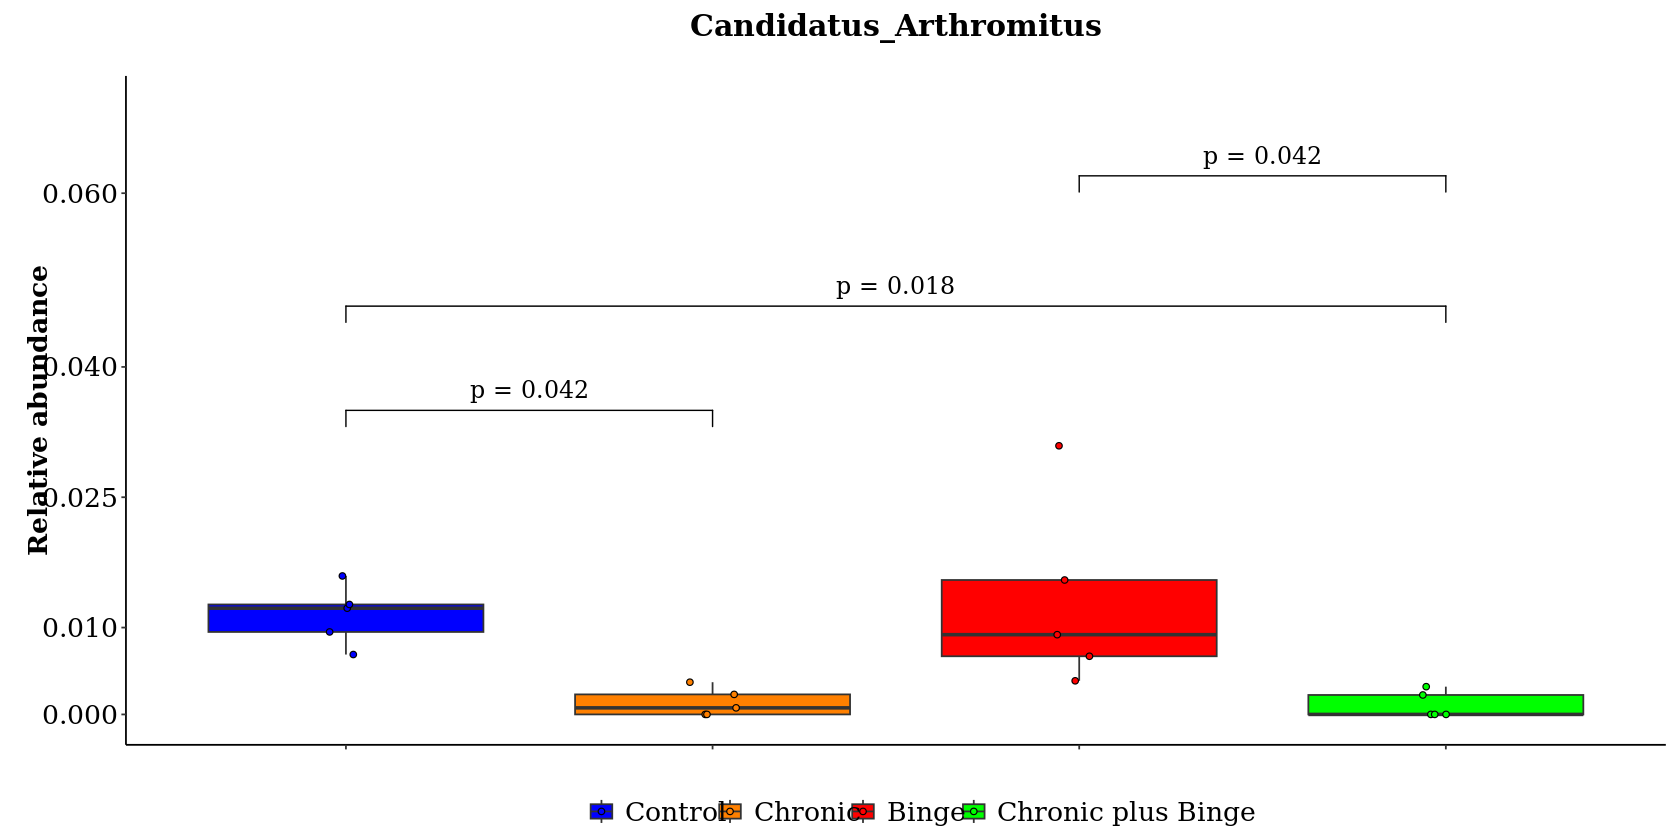

In [27]:
collum_p_Arthromitus <- c(0.035,0.02,0.047,0.024,0.026,0.062)
Arthromitus_all <- cbind(kruskal_results$Candidatus_Arthromitus, collum_p_Arthromitus)
Arthromitus_all$p_label <- paste0("p = ", round(kruskal_results$Candidatus_Arthromitus$p.adj, 3))
Arthromitus_all



#Boxplot Graph Candidatus_Arthromitus
g <- ggplot(subset(data_male, Grupos %in% "Candidatus_Arthromitus"), aes(x= factor(variable), y = value)) +
  geom_boxplot(outlier.shape = NA, aes(fill = variable))+
  geom_point(aes(fill= variable),position = position_jitterdodge(), shape = 21)  + 
  stat_pvalue_manual(data = Arthromitus_all,
                     y.position = "collum_p_Arthromitus", 
                     label = "p_label", hide.ns = TRUE, bracket.size = 0.4, size = 5, family = "serif", vjust = -0.3) + 
  labs(title= "Candidatus_Arthromitus", x = "", y ="Relative abundance") +
  scale_fill_manual(values = my_palette, labels = c("Control", "Chronic", "Binge", "Chronic plus Binge")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold", margin = margin(b = 20), family = "serif"),
        axis.text.x=element_blank(),
        axis.text.y = element_text(angle = 0, size = 16, colour = "black", family = "serif"),
        axis.text = element_text(size = 16, colour = "black", family = "serif"),
        axis.title=element_text(size=16, face = "bold", colour = "black", family = "serif"),
        strip.text.x = element_text(size = 14, face = "bold", colour = "black", family = "serif"),
        strip.background = element_blank(),
        panel.background = element_blank(),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom", legend.box="vertical", legend.margin=margin(), 
        legend.title=element_blank(),
        legend.text=element_text(size=16, family = "serif"),
        plot.margin = unit(c(3,3,3,6), units = "mm")) + scale_y_continuous(limits = c(0.0, 0.07),
                                                                           breaks = c(0.0, 
                                                                                      0.01, 
                                                                                       0.025, 0.04, 0.06)) 

print(g)


.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,collum_p_tyzerella,p_label
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
value,Control,Chronic,5,5,3.2553950,0.001132348,0.006794086,**,0.024,p = 0.007
value,Control,Binge,5,5,0.2284488,0.819297378,1.000000000,ns,0.020,p = 1
value,Control,Chronic.Binge,5,5,0.9709073,0.331594453,1.000000000,ns,0.020,p = 1
value,Chronic,Binge,5,5,-3.0269462,0.002470379,0.014822274,*,0.030,p = 0.015
value,Chronic,Chronic.Binge,5,5,-2.2844877,0.022342884,0.134057303,ns,0.026,p = 0.134
value,Binge,Chronic.Binge,5,5,0.7424585,0.457809582,1.000000000,ns,0.050,p = 1


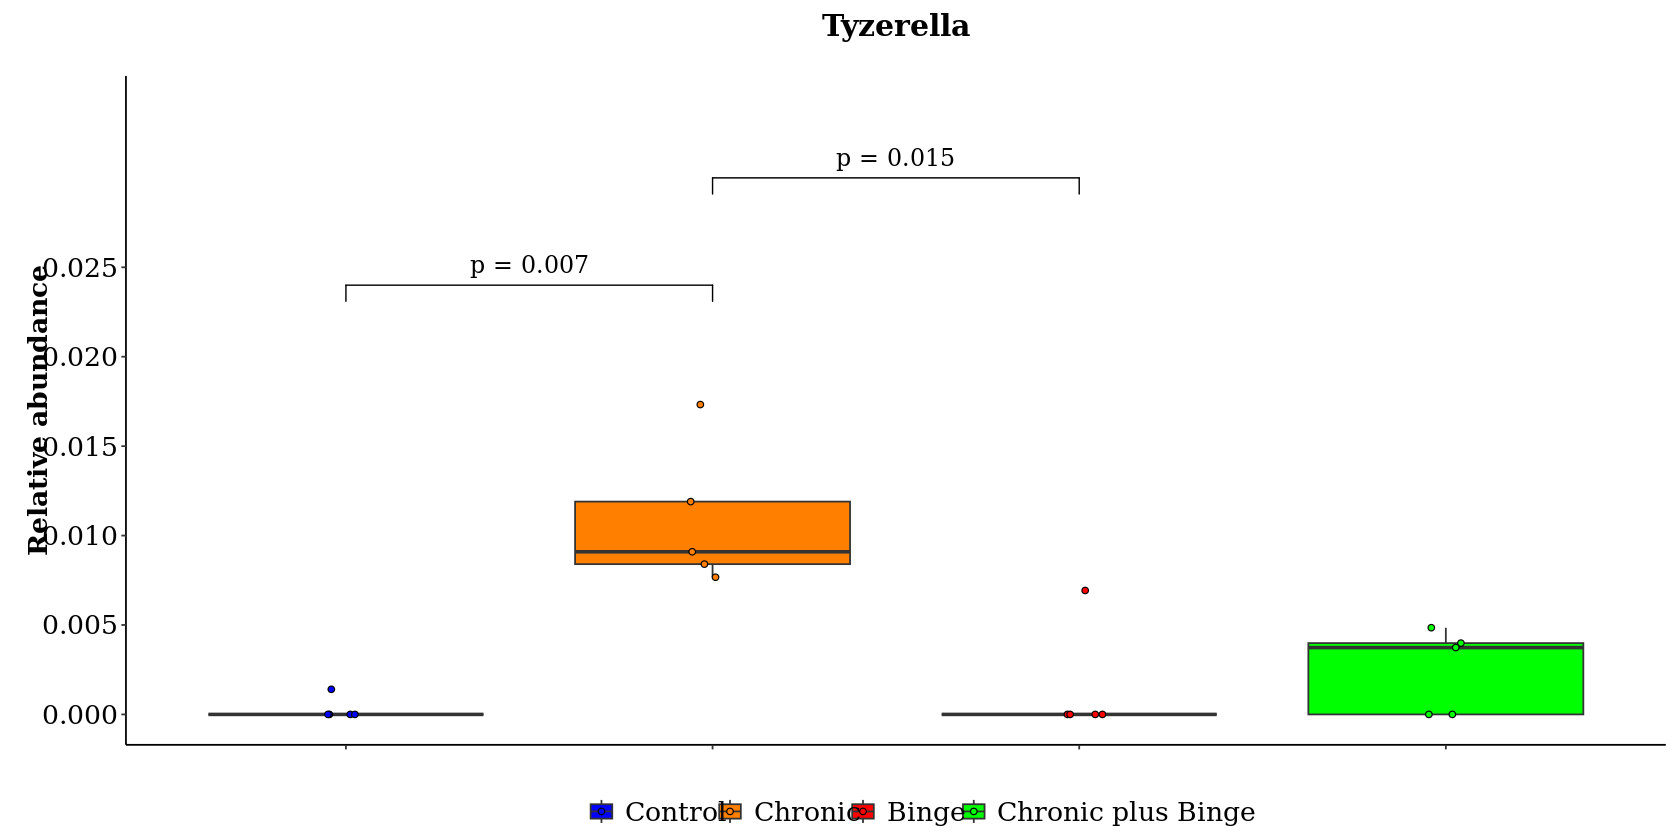

In [30]:
#plot for Tyzerella


collum_p_tyzerella <- c(0.024,0.02,0.020,0.03,0.026,0.050)
Tyz_all <- cbind(kruskal_Tyzzerella, collum_p_tyzerella)
Tyz_all$p_label <- paste0("p = ", round(kruskal_Tyzzerella$p.adj, 3))
Tyz_all



#Boxplot Graph Tyzerella
h1 <- ggplot(subset(data_male, Grupos %in% "Tyzzerella"), aes(x= factor(variable), y = value)) +
  geom_boxplot(outlier.shape = NA, aes(fill = variable))+
  geom_point(aes(fill= variable),position = position_jitterdodge(), shape = 21)  + 
  stat_pvalue_manual(data = Tyz_all,
                     y.position = "collum_p_tyzerella", 
                     label = "p_label", hide.ns = TRUE, bracket.size = 0.4, size = 5, family = "serif", vjust = -0.3) + 
  labs(title= "Tyzerella", x = "", y ="Relative abundance") +
  scale_fill_manual(values = my_palette, labels = c("Control", "Chronic", "Binge", "Chronic plus Binge")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold", margin = margin(b = 20), family = "serif"),
        axis.text.x=element_blank(),
        axis.text.y = element_text(angle = 0, size = 16, colour = "black", family = "serif"),
        axis.text = element_text(size = 16, colour = "black", family = "serif"),
        axis.title=element_text(size=16, face = "bold", colour = "black", family = "serif"),
        strip.text.x = element_text(size = 14, face = "bold", colour = "black", family = "serif"),
        strip.background = element_blank(),
        panel.background = element_blank(),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom", legend.box="vertical", legend.margin=margin(), 
        legend.title=element_blank(),
        legend.text=element_text(size=16, family = "serif"),
        plot.margin = unit(c(3,3,3,6), units = "mm")) + scale_y_continuous(limits = c(0.0, 0.034),
                                                                           breaks = c(0.0, 0.005,
                                                                                      0.01, 
                                                                                      0.015, 0.02, 0.025)) 

print(h1)

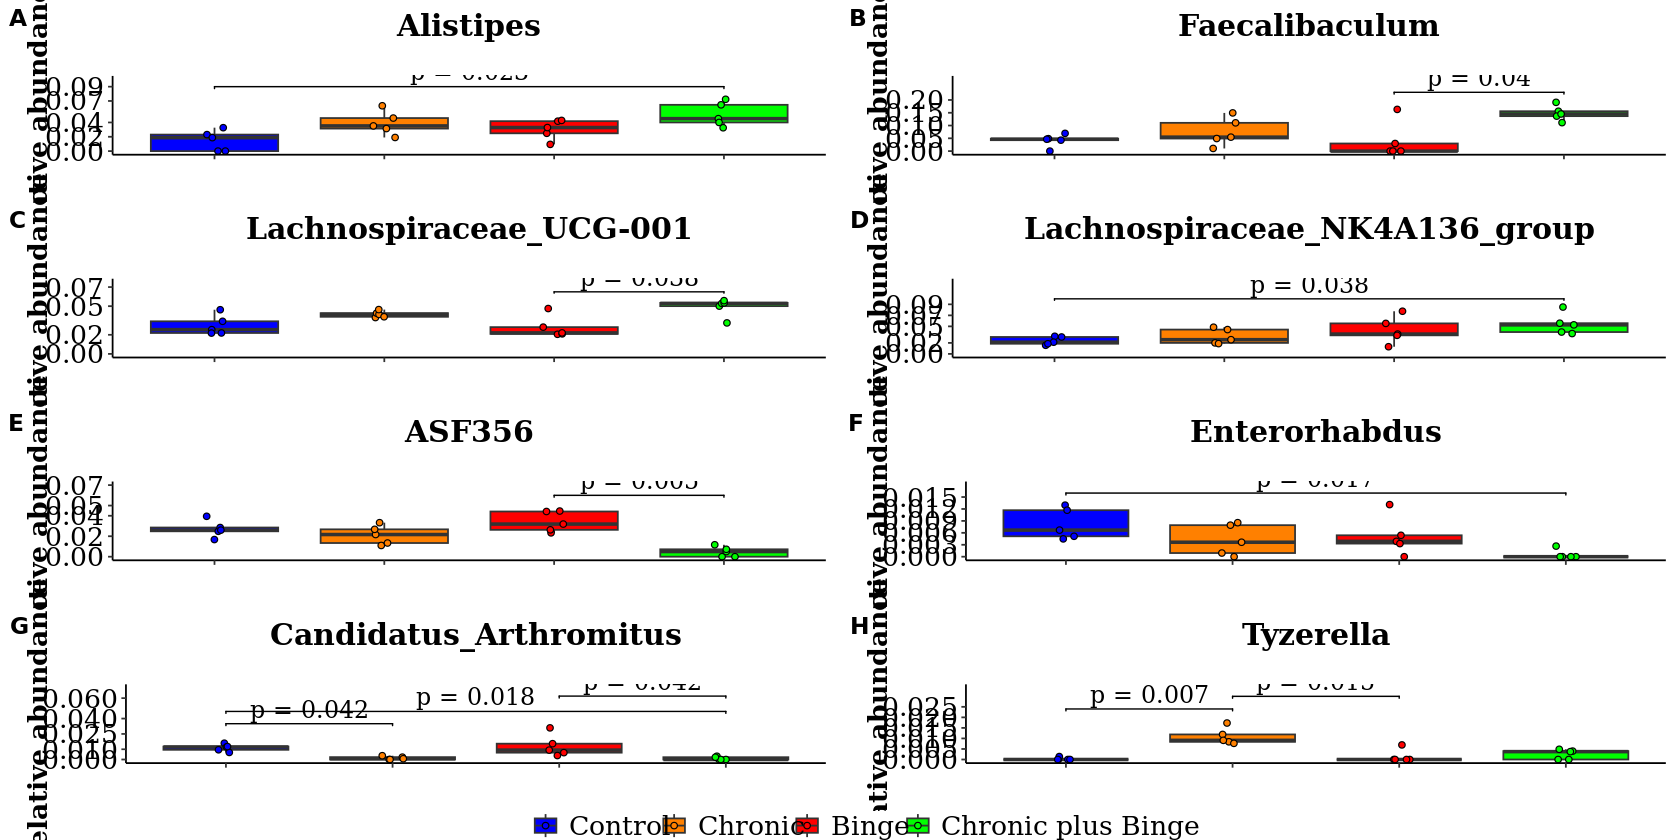

In [33]:
#combine plots

kruskal_species_male_plot <- ggarrange(a,b,c,d,e,f,g,h1,labels = c("A", "B", "C", "D","E", "F", "G", "H"),
                                       ncol = 2, nrow = 4, common.legend = TRUE,
                                       legend = "bottom") 

print(kruskal_species_male_plot)

In [34]:
##############################################################################################################
#female analysis

female_Data <- read.csv("normalized_genus FEMEAS.csv", sep=";")
head(female_Data)
female_Data <- female_Data[-70,]
female_Data <- female_Data[,c(-22, -23)]
#Extend data to get long
data_female <- reshape2::melt(female_Data, id.vars = "Group")
head(data_female)

,Group,Control,Control.1,Control.2,Control.3,Control.4,Chronic,Chronic.1,Chronic.2,Chronic.3,⋯,Binge.2,Binge.3,Binge.4,Chronic.Binge,Chronic.Binge.1,Chronic.Binge.2,Chronic.Binge.3,Chronic.Binge.4,X,Median
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<lgl>,<dbl>
1,Muribaculaceae,0.37286711,0.25512058,0.21777684,0.13568081,0.235117011,0.06286905,0.02882454,0.30210416,0.07497313,⋯,0.0984048062979076,0.09352555,0.13620242,0.144059467,0.09565595,0.08132986,0.16726376,0.09325278,NA,0.14312668
2,Muribaculum,0.12658653,0.13636079,0.06861607,0.13766374,0.122964281,0.04723862,0.08349861,0.06788537,0.01188444,⋯,0.20421586906981562,0.20289338,0.17137738,0.190871114,0.28855889,0.22321807,0.26697064,0.43027619,NA,0.10535395
3,Clostridia_UCG-014,0.03034378,0.01346696,0.05204265,0.06808076,0.043383057,0.09663077,0.04032791,0.04941445,0.07958784,⋯,0.05785166770250673,0.04401202,0.05656514,0.014559528,0.02849429,0.07073215,0.04485181,0.04161663,NA,0.07855099
4,Faecalibaculum,0.06136001,0.03457563,0.05995989,0.08670833,0.086560832,0.11608197,0.11199260,0.10577930,0.08357039,⋯,0.07157654858089911,0.01543477,0.08479286,0.000307163,0.08008293,0.07539514,0.03005630,0.06567097,NA,0.07025928
5,Bacteroides,0.10658149,0.00419668,0.04687005,0.07475063,0.008485014,0.10587009,0.00000000,0.06103018,0.07453063,⋯,0.0509633312616532,0.06382762,0.04409668,0.067391571,0.05819392,0.05650094,0.06495138,0.04863404,NA,0.06133202
6,Butyricimonas,0.02765403,0.00000000,0.00000000,0.04957337,0.027165731,0.07863842,0.09143197,0.00000000,0.07016878,⋯,0.05686761963952766,0.00000000,0.01257816,0.068251628,0.04416373,0.04081633,0.03991997,0.03246022,NA,0.05575859


,Group,variable,value
,<chr>,<fct>,<chr>
1,Muribaculaceae,Control,0.3728671093553
2,Muribaculum,Control,0.126586534420442
3,Clostridia_UCG-014,Control,0.030343784147264
4,Faecalibaculum,Control,0.0613600067243843
5,Bacteroides,Control,0.106581491132218
6,Butyricimonas,Control,0.0276540304278389


In [35]:
#Remove suffixes for duplicates in collumn
data_female$variable <- as.character(data_female$variable)
data_female$variable[grep("^Control", data_female$variable)] <- "Control"
data_female$variable[grep("^Binge", data_female$variable)] <- "Binge"                                                   
data_female$variable[grep(".Binge.\\d+$", data_female$variable)] <- "Chronic.Binge"
data_female$variable[grep("^Chronic.\\d+$", data_female$variable)] <- "Chronic"

View(data_female)

Group,variable,value
<chr>,<chr>,<chr>
Muribaculaceae,Control,0.3728671093553
Muribaculum,Control,0.126586534420442
Clostridia_UCG-014,Control,0.030343784147264
Faecalibaculum,Control,0.0613600067243843
Bacteroides,Control,0.106581491132218
Butyricimonas,Control,0.0276540304278389
Lactobacillus,Control,0
Alistipes,Control,0.0336219214928133
Lachnospiraceae_UCG-001,Control,0


In [36]:
#Import font

font_import()
fonts()
font_import(pattern = "serif", prompt = TRUE, recursive = TRUE)
font_import(paths = "/usr/share/fonts/")
loadfonts(device = "win")

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  n


Exiting.



[1] "cmex10"           "cmmi10"           "cmr10"            "cmsy10"          
 [5] "DejaVu Sans"      "DejaVu Sans Mono" "DejaVu Serif"     "dsrom10"         
 [9] "esint10"          "eufm10"           "FontAwesome"      "Lato Black"      
[13] "Lato"             "Lato Hairline"    "Lato Heavy"       "Lato Light"      
[17] "Lato Medium"      "Lato Semibold"    "Lato Thin"        "msam10"          
[21] "msbm10"           "rsfs10"           "stmary10"         "Ubuntu"          
[25] "Ubuntu Light"     "Ubuntu Thin"      "Ubuntu Condensed" "Ubuntu Mono"     
[29] "wasy10"

Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  n


Exiting.



Importing fonts may take a few minutes, depending on the number of fonts and the speed of the system.
Continue? [y/n]  n


Exiting.

Warning message in loadfonts_win(quiet = quiet):
“OS is not Windows. No fonts registered with windowsFonts().”


In [46]:
# Define the order of the groups
group_order <- c("Control", "Chronic", "Binge", "Chronic.Binge")

# Convert the 'variable' variable to a factor with the specified order
data_female$variable <- factor(data_female$variable, levels = group_order)


# Automatically extract unique group names from the 'Grupos' column
groups_to_analyze_fem <- unique(data_female$Group)

# Create an empty list to store results
kruskal_results_fem <- list()

# Loop over each group
for (group in groups_to_analyze_fem) {
  # Subset the data for the current group
  grouped_data_fem <- data_female[data_female$Group == group, ]
  
  # Perform the Dunn test
  kruskal_test_fem <- dunn_test(grouped_data_fem, value ~ variable, p.adjust.method = "bonferroni")
  
  # Store the result in the list
  kruskal_results_fem[[group]] <- kruskal_test_fem
}

In [47]:
# Combine results into a single data frame
kruskal_combined_fem <- do.call(rbind, lapply(names(kruskal_results_fem), function(group) {
  result_fem <- kruskal_results_fem[[group]]
  result_fem$Group <- group  # Add a column to indicate the group
  return(result_fem)
}))

# View the combined results
head(kruskal_combined_fem)


library(readr)
write_tsv(kruskal_combined_fem, "Kruskal_female_result.tsv")

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,Group
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<chr>
value,Control,Chronic,5,5,-2.4053512,0.01615693,0.09694159,ns,Muribaculaceae
value,Control,Binge,5,5,-1.4432107,0.14896112,0.89376675,ns,Muribaculaceae
value,Control,Chronic.Binge,5,5,-1.6035675,0.10880943,0.65285658,ns,Muribaculaceae
value,Chronic,Binge,5,5,0.9621405,0.33597905,1.00000000,ns,Muribaculaceae
value,Chronic,Chronic.Binge,5,5,0.8017837,0.42267807,1.00000000,ns,Muribaculaceae
value,Binge,Chronic.Binge,5,5,-0.1603567,0.87260006,1.00000000,ns,Muribaculaceae


In [48]:
#filter by those whose are significant

kruskal_combined_fem_sig <- kruskal_combined_fem%>% filter(p.adj.signif !="ns")

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,collum_p_faec_fem,p_label
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
value,Control,Chronic,5,5,2.0846377,0.037102201,0.22261321,ns,0.090,p = 0.223
value,Control,Binge,5,5,-0.2138090,0.830696011,1.00000000,ns,0.090,p = 1
value,Control,Chronic.Binge,5,5,-0.6948792,0.487130991,1.00000000,ns,0.092,p = 1
value,Chronic,Binge,5,5,-2.2984467,0.021536379,0.12921828,ns,0.094,p = 0.129
value,Chronic,Chronic.Binge,5,5,-2.7795169,0.005443982,0.03266389,*,0.270,p = 0.033
value,Binge,Chronic.Binge,5,5,-0.4810702,0.630466582,1.00000000,ns,0.096,p = 1


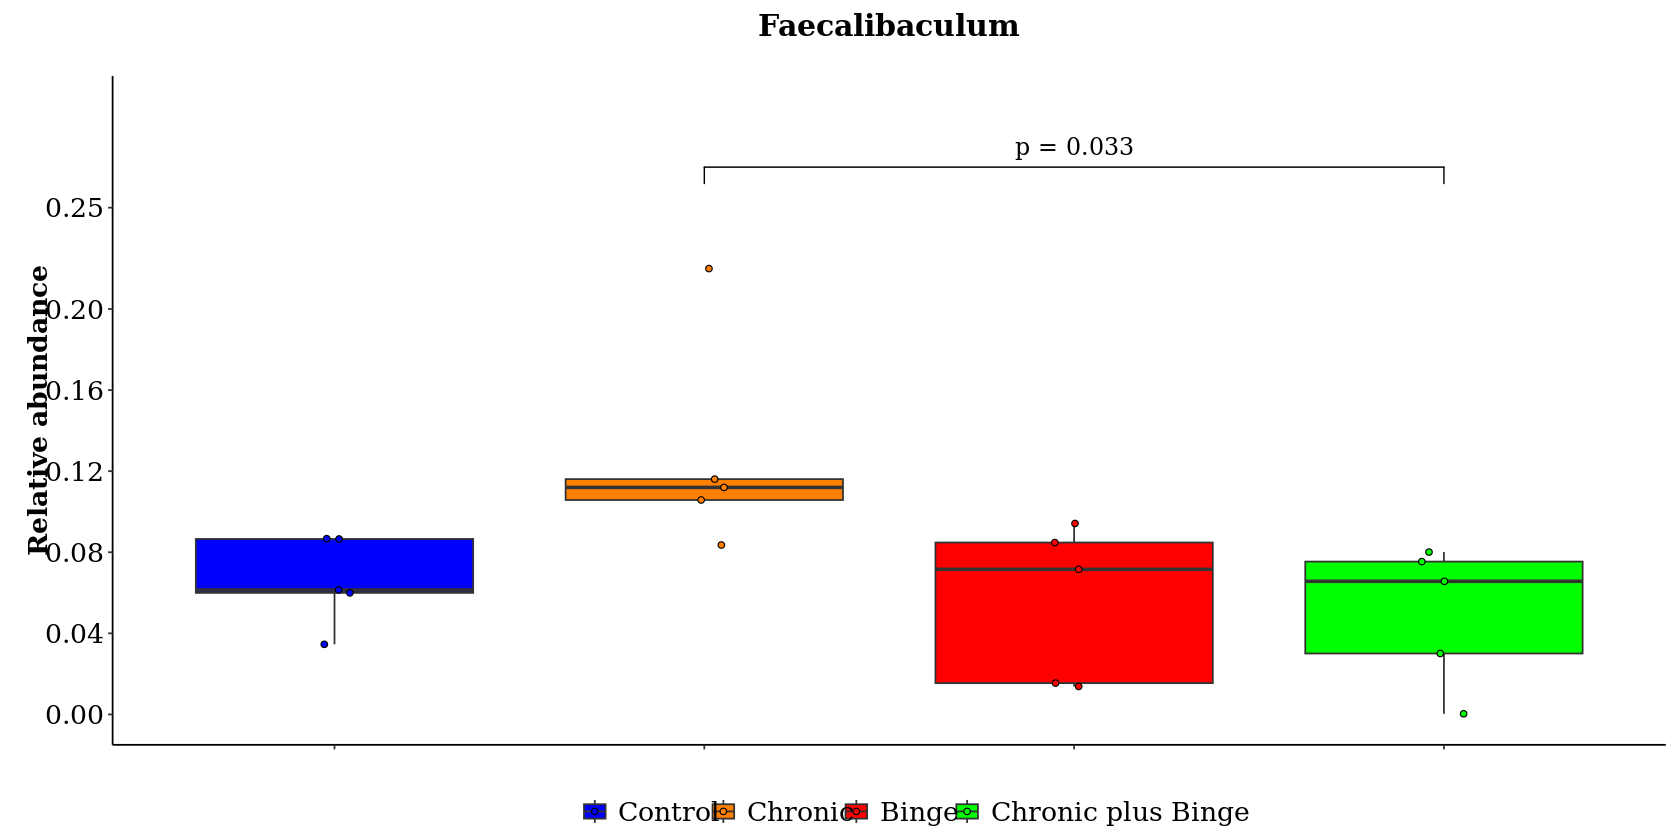

In [49]:
#plots for female

collum_p_faec_fem <- c(0.09,0.09,0.092,0.094,0.27,0.096)
faec_fem_all <- cbind(kruskal_results_fem$Faecalibaculum, collum_p_faec_fem)
faec_fem_all$p_label <- paste0("p = ", round(kruskal_results_fem$Faecalibaculum$p.adj, 3))
faec_fem_all



#Boxplot Graph Faecalibaculum
h <- ggplot(subset(data_female, Group %in% "Faecalibaculum"), 
            aes(x= factor(variable), y = as.numeric(value))) +
  geom_boxplot(outlier.shape = NA, aes(fill = variable))+
  geom_point(aes(fill= variable),position = position_jitterdodge(), shape = 21)  + 
  stat_pvalue_manual(data = faec_fem_all,
                     y.position = "collum_p_faec_fem", 
                     label = "p_label", hide.ns = TRUE, bracket.size = 0.4, size = 5, family = "serif", vjust = -0.3) + 
  labs(title= "Faecalibaculum", x = "", y ="Relative abundance") +
  scale_fill_manual(values = my_palette, labels = c("Control", "Chronic", "Binge", "Chronic plus Binge")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold", margin = margin(b = 20), family = "serif"),
        axis.text.x=element_blank(),
        axis.text.y = element_text(angle = 0, size = 16, colour = "black", family = "serif"),
        axis.text = element_text(size = 16, colour = "black", family = "serif"),
        axis.title=element_text(size=16, face = "bold", colour = "black", family = "serif"),
        strip.text.x = element_text(size = 14, face = "bold", colour = "black", family = "serif"),
        strip.background = element_blank(),
        panel.background = element_blank(),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom", legend.box="vertical", legend.margin=margin(), 
        legend.title=element_blank(),
        legend.text=element_text(size=16, family = "serif"),
        plot.margin = unit(c(3,3,3,6), units = "mm")) + scale_y_continuous(limits = c(0.0, 0.3),
                                                                           breaks = c(0.0,
                                                                                       0.04,
                                                                                      0.08, 0.12, 0.16,0.2, 0.25)) 

print(h)

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,collum_p_alis_fem,p_label
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
value,Control,Chronic,5,5,0.9621405,0.335979047,1.000000000,ns,0.090,p = 1
value,Control,Binge,5,5,-0.4810702,0.630466582,1.000000000,ns,0.090,p = 1
value,Control,Chronic.Binge,5,5,-2.2984467,0.021536379,0.129218276,ns,0.092,p = 0.129
value,Chronic,Binge,5,5,-1.4432107,0.148961124,0.893766747,ns,0.094,p = 0.894
value,Chronic,Chronic.Binge,5,5,-3.2605872,0.001111818,0.006670908,**,0.150,p = 0.007
value,Binge,Chronic.Binge,5,5,-1.8173764,0.069159492,0.414956952,ns,0.096,p = 0.415


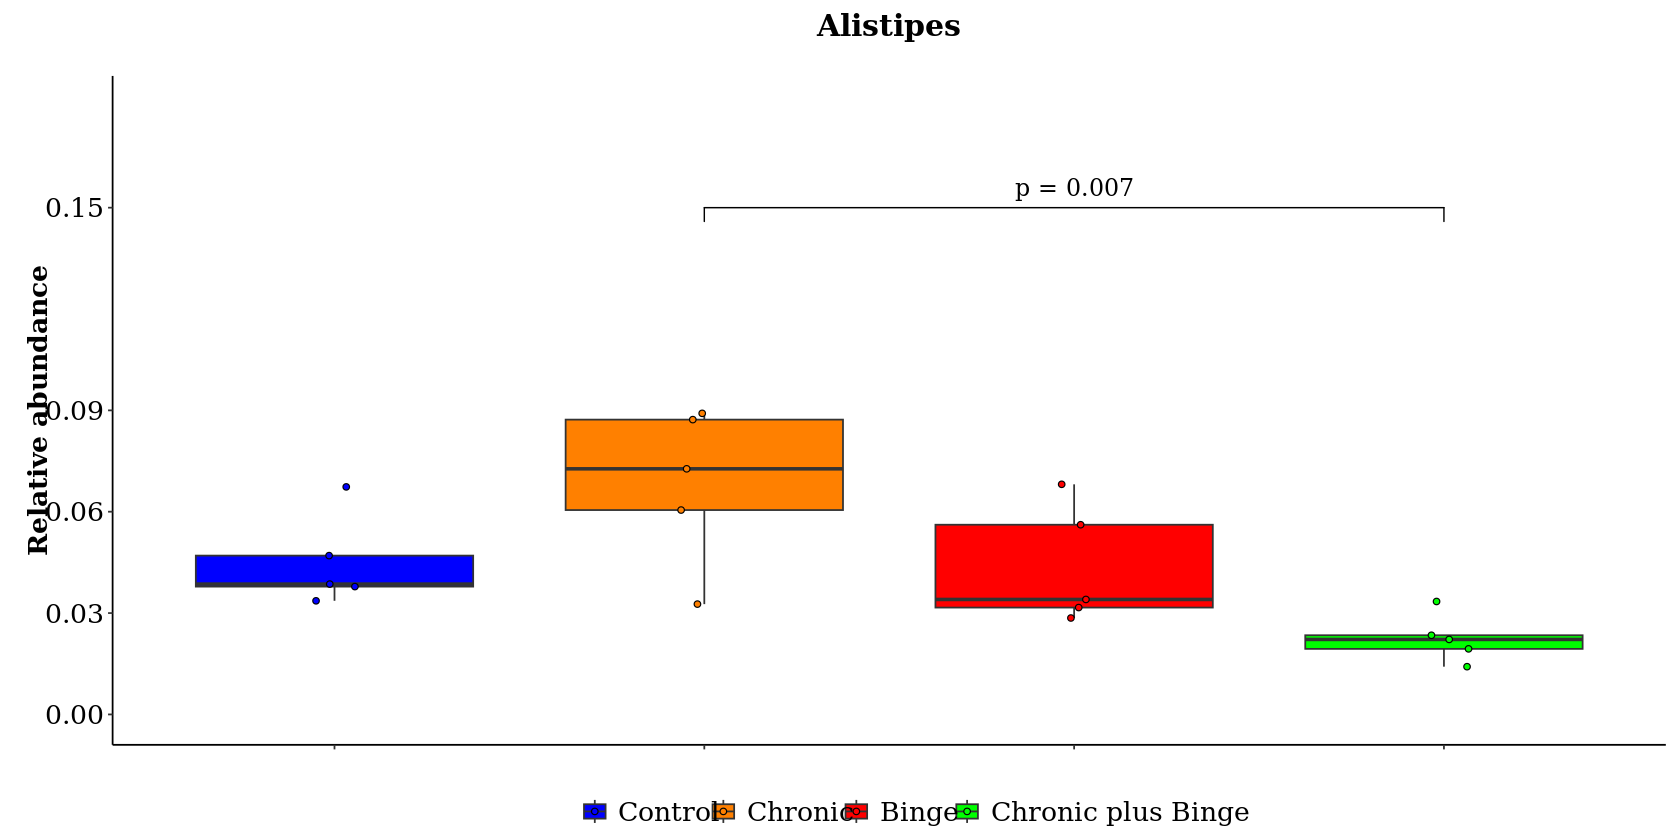

In [50]:
#Alistipes


collum_p_alis_fem <- c(0.09,0.09,0.092,0.094,0.15,0.096)
alis_fem_all <- cbind(kruskal_results_fem$Alistipes, collum_p_alis_fem)
alis_fem_all$p_label <- paste0("p = ", round(kruskal_results_fem$Alistipes$p.adj, 3))
alis_fem_all



#Boxplot Graph Alistipes
i <- ggplot(subset(data_female, Group %in% "Alistipes"), 
            aes(x= factor(variable), y = as.numeric(value))) +
  geom_boxplot(outlier.shape = NA, aes(fill = variable))+
  geom_point(aes(fill= variable),position = position_jitterdodge(), shape = 21)  + 
  stat_pvalue_manual(data = alis_fem_all,
                     y.position = "collum_p_alis_fem", 
                     label = "p_label", hide.ns = TRUE, bracket.size = 0.4, size = 5, family = "serif", vjust = -0.3) + 
  labs(title= "Alistipes", x = "", y ="Relative abundance") +
  scale_fill_manual(values = my_palette, labels = c("Control", "Chronic", "Binge", "Chronic plus Binge")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold", margin = margin(b = 20), family = "serif"),
        axis.text.x=element_blank(),
        axis.text.y = element_text(angle = 0, size = 16, colour = "black", family = "serif"),
        axis.text = element_text(size = 16, colour = "black", family = "serif"),
        axis.title=element_text(size=16, face = "bold", colour = "black", family = "serif"),
        strip.text.x = element_text(size = 14, face = "bold", colour = "black", family = "serif"),
        strip.background = element_blank(),
        panel.background = element_blank(),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom", legend.box="vertical", legend.margin=margin(), 
        legend.title=element_blank(),
        legend.text=element_text(size=16, family = "serif"),
        plot.margin = unit(c(3,3,3,6), units = "mm")) + scale_y_continuous(limits = c(0.0, 0.18),
                                                                           breaks = c(0.0,
                                                                                      0.03, 0.06,
                                                                                      0.09, 0.15)) 

print(i)

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,collum_p_lach_FCS_fem,p_label
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
value,Control,Chronic,5,5,-0.5731459,0.56654594,1.00000000,ns,0.090,p = 1
value,Control,Binge,5,5,2.4735768,0.01337680,0.08026082,ns,0.090,p = 0.08
value,Control,Chronic.Binge,5,5,0.6334770,0.52642220,1.00000000,ns,0.092,p = 1
value,Chronic,Binge,5,5,3.0467227,0.00231351,0.01388106,*,0.065,p = 0.014
value,Chronic,Chronic.Binge,5,5,1.2066228,0.22757742,1.00000000,ns,0.150,p = 1
value,Binge,Chronic.Binge,5,5,-1.8400998,0.06575358,0.39452148,ns,0.096,p = 0.395


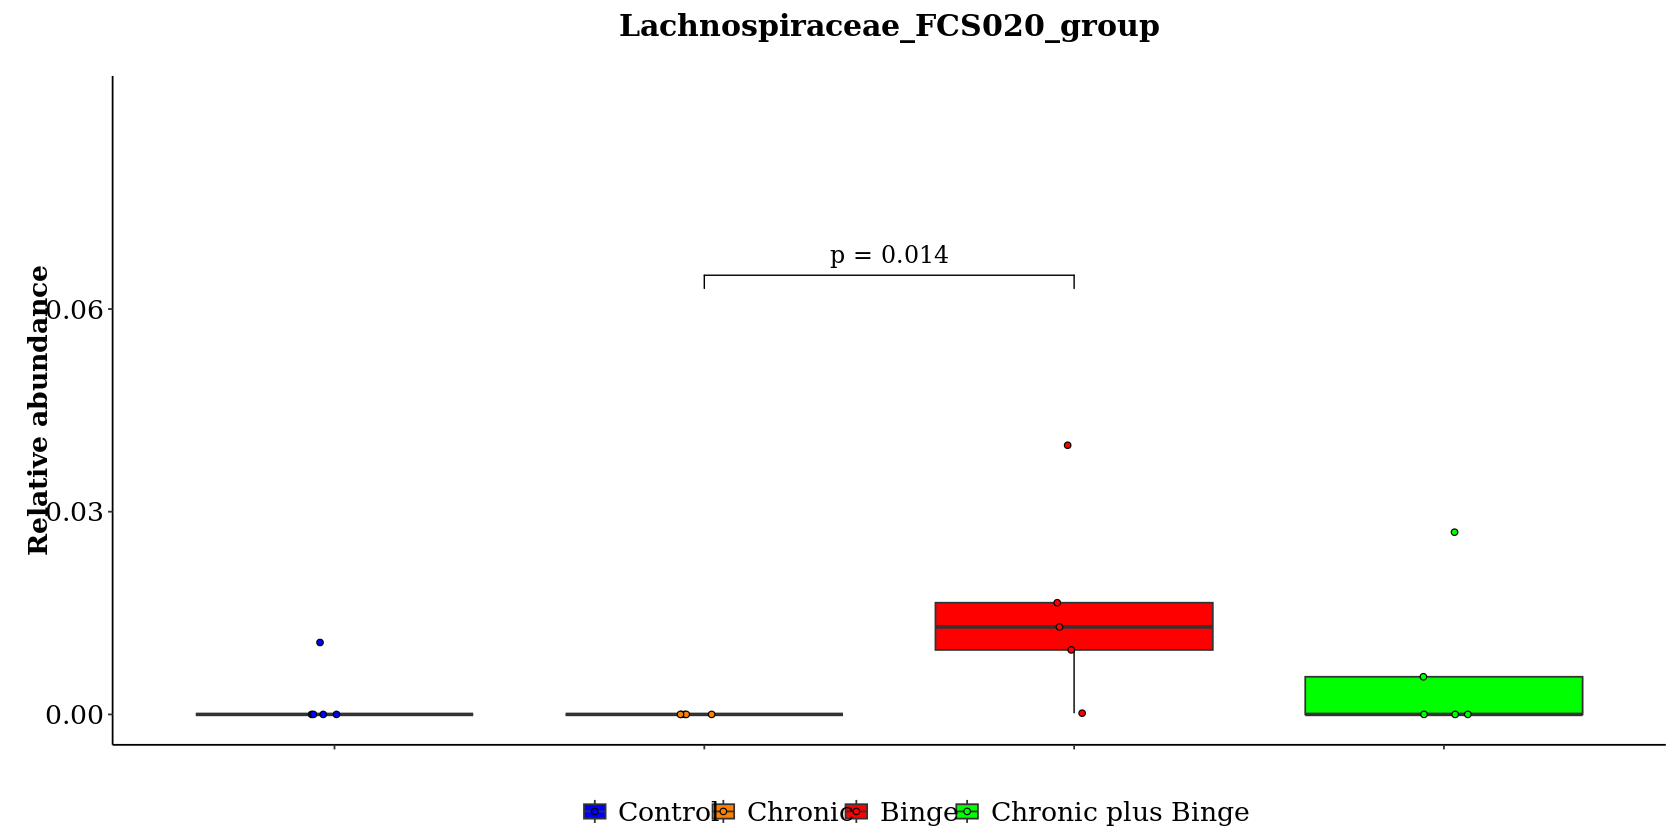

In [51]:
#Lachnospiraceae_FCS020_group



collum_p_lach_FCS_fem <- c(0.09,0.09,0.092,0.065,0.15,0.096)
lach_FCS_fem_all <- cbind(kruskal_results_fem$Lachnospiraceae_FCS020_group, collum_p_lach_FCS_fem)
lach_FCS_fem_all$p_label <- paste0("p = ", round(kruskal_results_fem$Lachnospiraceae_FCS020_group$p.adj, 3))
lach_FCS_fem_all



#Boxplot Graph Lachnospiraceae_FCS020_group
j <- ggplot(subset(data_female, Group %in% "Lachnospiraceae_FCS020_group"), 
            aes(x= factor(variable), y = as.numeric(value))) +
  geom_boxplot(outlier.shape = NA, aes(fill = variable))+
  geom_point(aes(fill= variable),position = position_jitterdodge(), shape = 21)  + 
  stat_pvalue_manual(data = lach_FCS_fem_all,
                     y.position = "collum_p_lach_FCS_fem", 
                     label = "p_label", hide.ns = TRUE, bracket.size = 0.4, size = 5, family = "serif", vjust = -0.3) + 
  labs(title= "Lachnospiraceae_FCS020_group", x = "", y ="Relative abundance") +
  scale_fill_manual(values = my_palette, labels = c("Control", "Chronic", "Binge", "Chronic plus Binge")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold", margin = margin(b = 20), family = "serif"),
        axis.text.x=element_blank(),
        axis.text.y = element_text(angle = 0, size = 16, colour = "black", family = "serif"),
        axis.text = element_text(size = 16, colour = "black", family = "serif"),
        axis.title=element_text(size=16, face = "bold", colour = "black", family = "serif"),
        strip.text.x = element_text(size = 14, face = "bold", colour = "black", family = "serif"),
        strip.background = element_blank(),
        panel.background = element_blank(),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom", legend.box="vertical", legend.margin=margin(), 
        legend.title=element_blank(),
        legend.text=element_text(size=16, family = "serif"),
        plot.margin = unit(c(3,3,3,6), units = "mm")) + scale_y_continuous(limits = c(0.0, 0.09),
                                                                           breaks = c(0.0,
                                                                                      0.03, 0.06
                                                                                      )) 

print(j)

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,collum_p_muri_fem,p_label
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
value,Control,Chronic,5,5,-1.4432107,0.148961124,0.893766747,ns,0.090,p = 0.894
value,Control,Binge,5,5,0.2672612,0.789268026,1.000000000,ns,0.090,p = 1
value,Control,Chronic.Binge,5,5,2.1380899,0.032509445,0.195056668,ns,0.092,p = 0.195
value,Chronic,Binge,5,5,1.7104719,0.087178636,0.523071818,ns,0.065,p = 0.523
value,Chronic,Chronic.Binge,5,5,3.5813006,0.000341888,0.002051328,**,0.550,p = 0.002
value,Binge,Chronic.Binge,5,5,1.8708287,0.061368829,0.368212975,ns,0.096,p = 0.368


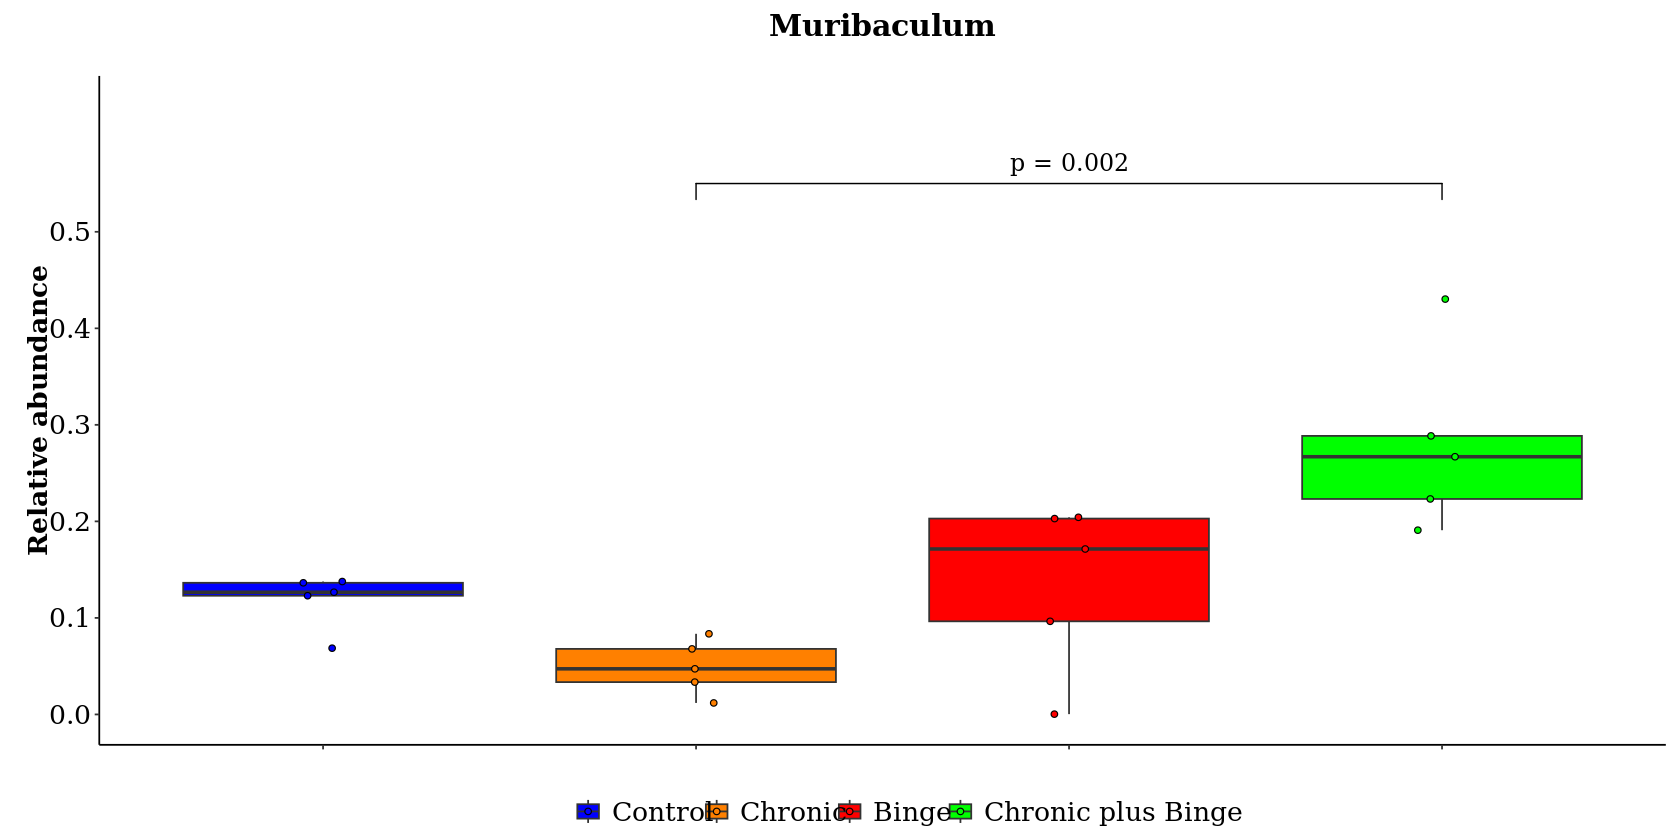

In [52]:
#Muribaculum femeas



collum_p_muri_fem <- c(0.09,0.09,0.092,0.065,0.55,0.096)
muri_fem_all <- cbind(kruskal_results_fem$Muribaculum, collum_p_muri_fem)
muri_fem_all$p_label <- paste0("p = ", round(kruskal_results_fem$Muribaculum$p.adj, 3))
muri_fem_all



#Boxplot Graph Muribaculum femeas
k <- ggplot(subset(data_female, Group %in% "Muribaculum"), 
            aes(x= factor(variable), y = as.numeric(value))) +
  geom_boxplot(outlier.shape = NA, aes(fill = variable))+
  geom_point(aes(fill= variable),position = position_jitterdodge(), shape = 21)  + 
  stat_pvalue_manual(data = muri_fem_all,
                     y.position = "collum_p_muri_fem", 
                     label = "p_label", hide.ns = TRUE, bracket.size = 0.4, size = 5, family = "serif", vjust = -0.3) + 
  labs(title= "Muribaculum", x = "", y ="Relative abundance") +
  scale_fill_manual(values = my_palette, labels = c("Control", "Chronic", "Binge", "Chronic plus Binge")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold", margin = margin(b = 20), family = "serif"),
        axis.text.x=element_blank(),
        axis.text.y = element_text(angle = 0, size = 16, colour = "black", family = "serif"),
        axis.text = element_text(size = 16, colour = "black", family = "serif"),
        axis.title=element_text(size=16, face = "bold", colour = "black", family = "serif"),
        strip.text.x = element_text(size = 14, face = "bold", colour = "black", family = "serif"),
        strip.background = element_blank(),
        panel.background = element_blank(),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom", legend.box="vertical", legend.margin=margin(), 
        legend.title=element_blank(),
        legend.text=element_text(size=16, family = "serif"),
        plot.margin = unit(c(3,3,3,6), units = "mm")) + scale_y_continuous(limits = c(0.0, 0.63),
                                                                           breaks = c(0.0,
                                                                                      0.1, 0.2,0.3,0.4, 0.5
                                                                           )) 

print(k)

.y.,group1,group2,n1,n2,statistic,p,p.adj,p.adj.signif,collum_p_butyri_fem,p_label
<chr>,<chr>,<chr>,<int>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>
value,Control,Chronic,5,5,0.5731459,0.566545943,1.00000000,ns,0.090,p = 1
value,Control,Binge,5,5,2.8958948,0.003780791,0.02268474,*,0.020,p = 0.023
value,Control,Chronic.Binge,5,5,1.3574507,0.174638047,1.00000000,ns,0.092,p = 1
value,Chronic,Binge,5,5,2.3227490,0.020192641,0.12115585,ns,0.065,p = 0.121
value,Chronic,Chronic.Binge,5,5,0.7843049,0.432861254,1.00000000,ns,0.550,p = 1
value,Binge,Chronic.Binge,5,5,-1.5384441,0.123940059,0.74364035,ns,0.096,p = 0.744


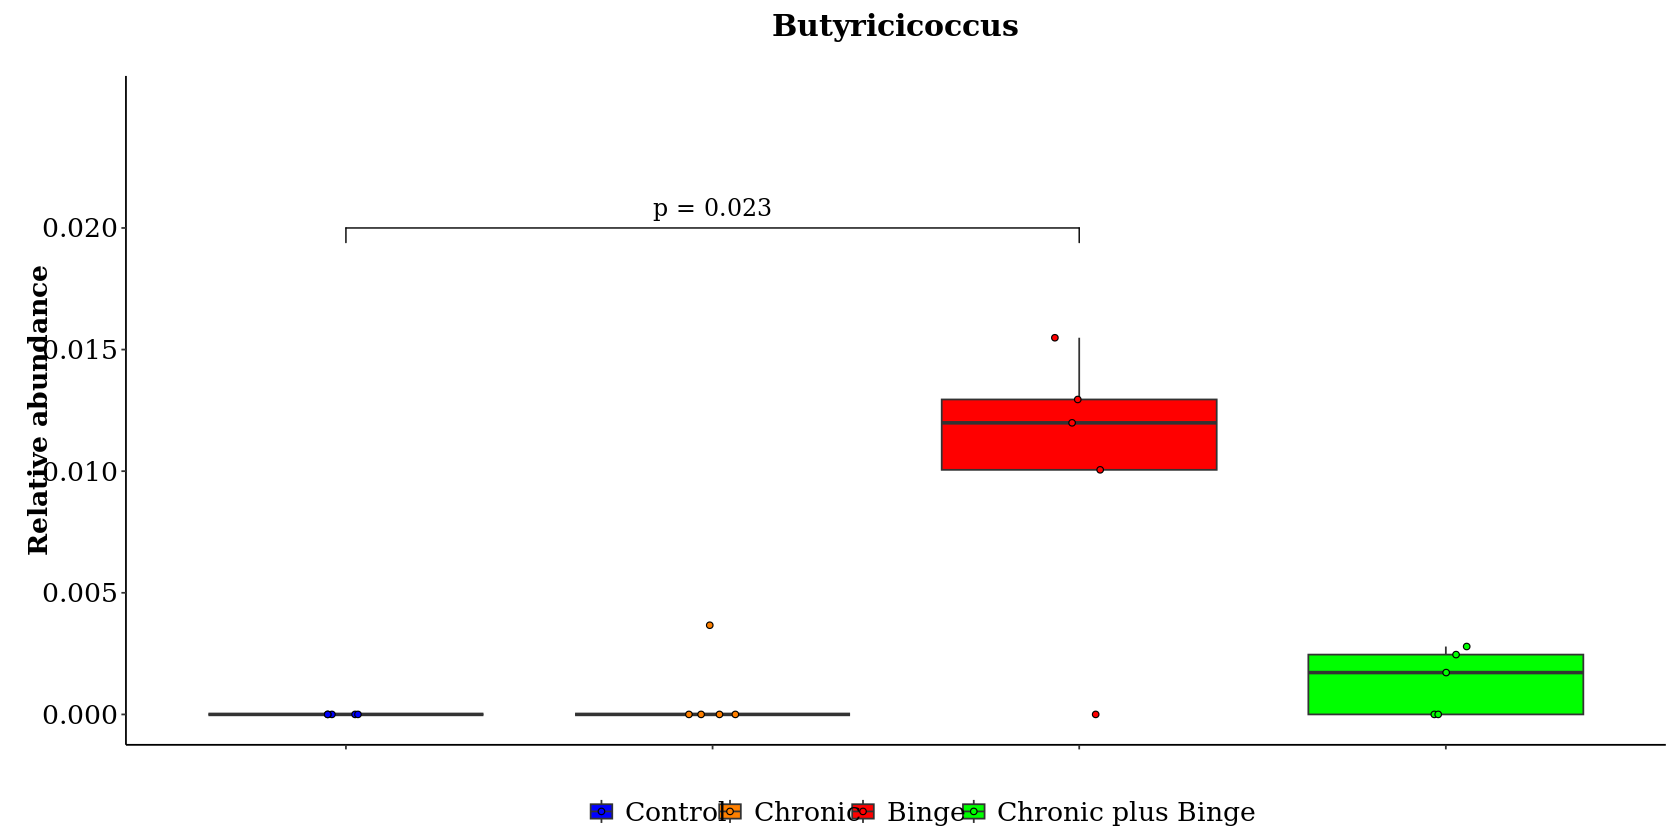

In [53]:
#Butyricicoccus femeas



collum_p_butyri_fem <- c(0.09,0.02,0.092,0.065,0.55,0.096)
butyri_fem_all <- cbind(kruskal_results_fem$Butyricicoccus, collum_p_butyri_fem)
butyri_fem_all$p_label <- paste0("p = ", round(kruskal_results_fem$Butyricicoccus$p.adj, 3))
butyri_fem_all



l <- ggplot(subset(data_female, Group %in% "Butyricicoccus"), 
            aes(x= factor(variable), y = as.numeric(value))) +
  geom_boxplot(outlier.shape = NA, aes(fill = variable))+
  geom_point(aes(fill= variable),position = position_jitterdodge(), shape = 21)  + 
  stat_pvalue_manual(data = butyri_fem_all,
                     y.position = "collum_p_butyri_fem", 
                     label = "p_label", hide.ns = TRUE, bracket.size = 0.4, size = 5, family = "serif", vjust = -0.3) + 
  labs(title= "Butyricicoccus", x = "", y ="Relative abundance") +
  scale_fill_manual(values = my_palette, labels = c("Control", "Chronic", "Binge", "Chronic plus Binge")) +
  theme_bw() +
  theme(plot.title = element_text(hjust = 0.5, size = 18, face = "bold", margin = margin(b = 20), family = "serif"),
        axis.text.x=element_blank(),
        axis.text.y = element_text(angle = 0, size = 16, colour = "black", family = "serif"),
        axis.text = element_text(size = 16, colour = "black", family = "serif"),
        axis.title=element_text(size=16, face = "bold", colour = "black", family = "serif"),
        strip.text.x = element_text(size = 14, face = "bold", colour = "black", family = "serif"),
        strip.background = element_blank(),
        panel.background = element_blank(),
        panel.border = element_blank(),
        panel.grid.major = element_blank(),
        panel.grid.minor = element_blank(),
        axis.line = element_line(colour = "black"),
        legend.position="bottom", legend.box="vertical", legend.margin=margin(), 
        legend.title=element_blank(),
        legend.text=element_text(size=16, family = "serif"),
        plot.margin = unit(c(3,3,3,6), units = "mm")) + scale_y_continuous(limits = c(0.0, 0.025),
                                                                           breaks = c(0.0,
                                                                                      0.005, 0.01,0.015, 0.02
                                                                           )) 

print(l)

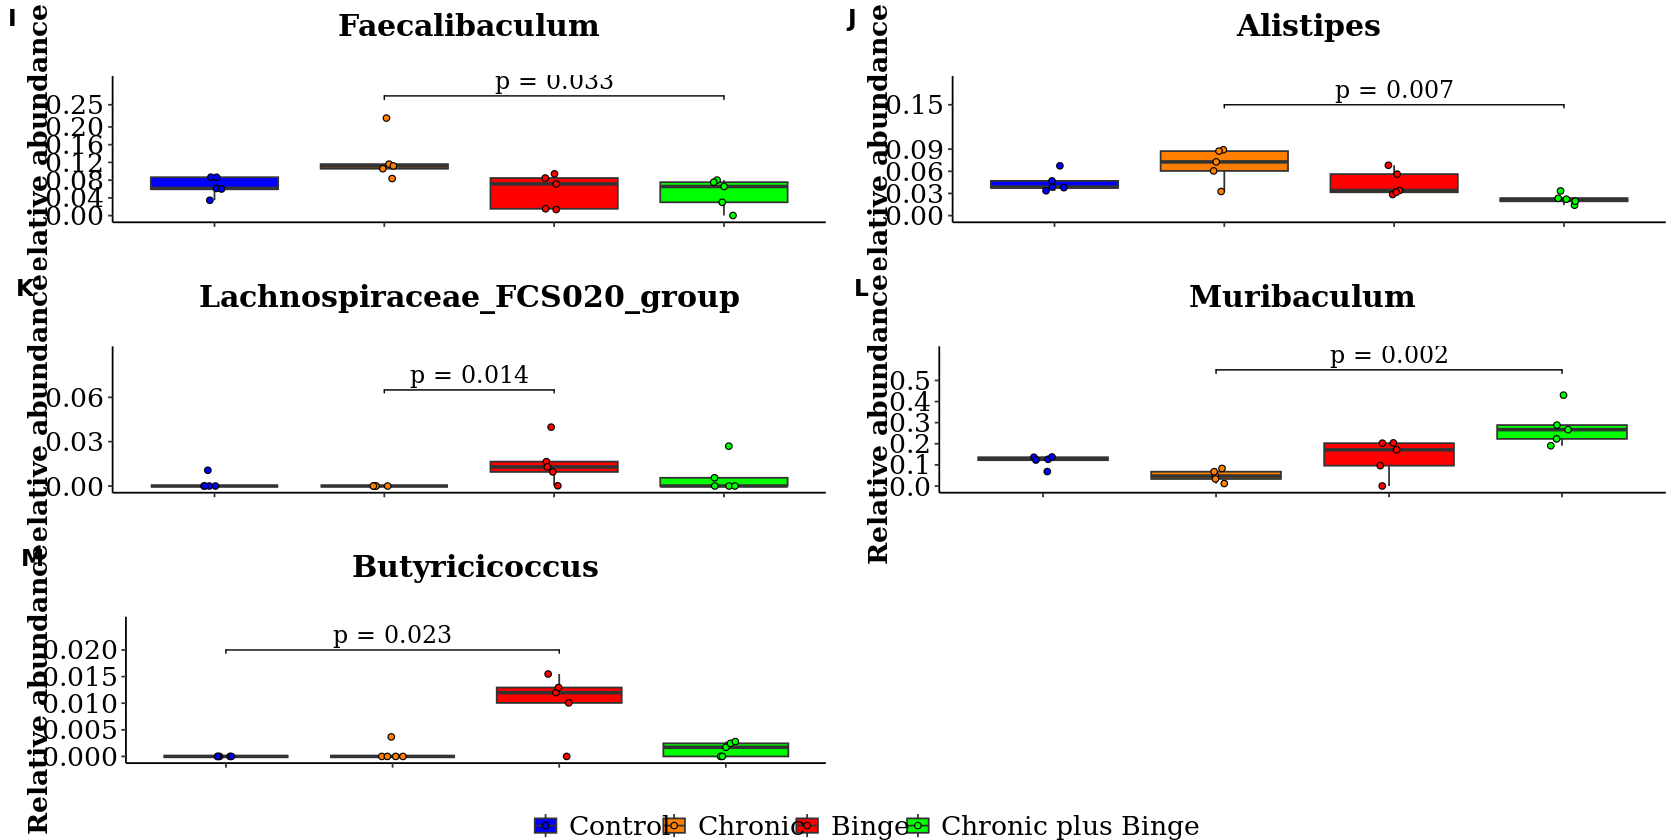

In [54]:

#combine female plot
kruskal_species_female_plot <- ggarrange(h,i,j,k,l,labels = c("I", "J", "K", "L","M"),
                                       ncol = 2, nrow = 3, common.legend = TRUE,
                                       legend = "bottom", hjust = -0.9) 
print(kruskal_species_female_plot)